# Fake News Detection - Improting Libraries and Loading Data

## 1. Dataset Information:
- **File**: combined_final.csv
- **Content**: Combined dataset of fake and real news articles
- **Target**: Binary classification (fake vs real news)

In [ ]:
import matplotlib.pyplot as plt
#import tensorflow as tf
import re
#from tensorflow.keras.preprocessing.text import Tokenizer
#import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
plt.style.use('ggplot')
#print("Tensorflow version " + tf.__version__)
import pandas as pd
import plotly as pio

# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Text processing and NLP libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud


In [ ]:
#Data is getting loaded from Google Drive

from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/MyDrive/"

#path = "/content/drive/MyDrive/combined_final.csv"
#with open(path, "r", encoding="utf-8", errors="replace") as f:
  #df = pd.read_csv(f)

Mounted at /content/drive


In [ ]:
#Data is getting loaded from Local Drive

df = pd.read_csv('combined_final.csv')
print(df.shape)
df.head()

(82533, 6)


,id,title,text,subject,date,label
0,1,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,NaN,NaN,0
1,2,"May Brexit offer would hurt, cost EU citizens ...",BRUSSELS (Reuters) - British Prime Minister Th...,NaN,NaN,0
2,3,Schumer calls on Trump to appoint official to ...,"WASHINGTON (Reuters) - Charles Schumer, the to...",NaN,NaN,0
3,4,No Change Expected for ESPN Political Agenda D...,As more and more sports fans turn off ESPN to ...,NaN,NaN,0
4,5,Billionaire Odebrecht in Brazil scandal releas...,RIO DE JANEIRO/SAO PAULO (Reuters) - Billionai...,NaN,NaN,0


# 2. Fake News Detection - Comprehensive Exploratory Data Analysis (EDA)

Performs extensive exploratory data analysis on a combined dataset of fake and real news articles to understand patterns and prepare for building a machine learning model for real-time fake news detection.

## Objectives:
1. Understand the structure and characteristics of the dataset
2. Identify patterns that distinguish fake from real news
3. Perform comprehensive text analysis and visualization
4. Engineer features for machine learning model development
5. Provide insights for building an effective fake news detection system

## Dataset Information:
- **File**: combined_final.csv
- **Content**: Combined dataset of fake and real news articles
- **Target**: Binary classification (fake vs real news)

In [ ]:
# Getting Data Frame Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82533 entries, 0 to 82532
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       82533 non-null  int64  
 1   title    79463 non-null  object 
 2   text     82291 non-null  object 
 3   subject  0 non-null      float64
 4   date     0 non-null      float64
 5   label    82533 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.8+ MB


In [ ]:
# Describe Data Frame
df.describe()

,id,subject,date,label
count,82533.000000,0.0,0.0,82533.000000
mean,46693.281584,NaN,NaN,0.497159
std,29225.227980,NaN,NaN,0.499995
min,1.000000,NaN,NaN,0.000000
25%,21187.000000,NaN,NaN,0.000000
50%,44702.000000,NaN,NaN,0.000000
75%,70217.000000,NaN,NaN,1.000000
max,106815.000000,NaN,NaN,1.000000


**Getting Missing Value Info and Visualize**

In [ ]:
# Getting Data Frame Info about Missing Values

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Count', ascending=False)

print(missing_df)

    Column  Missing_Count  Missing_Percentage
4     date          82533          100.000000
3  subject          82533          100.000000
1    title           3070            3.719724
2     text            242            0.293216
0       id              0            0.000000
5    label              0            0.000000

Total missing values: 168,378


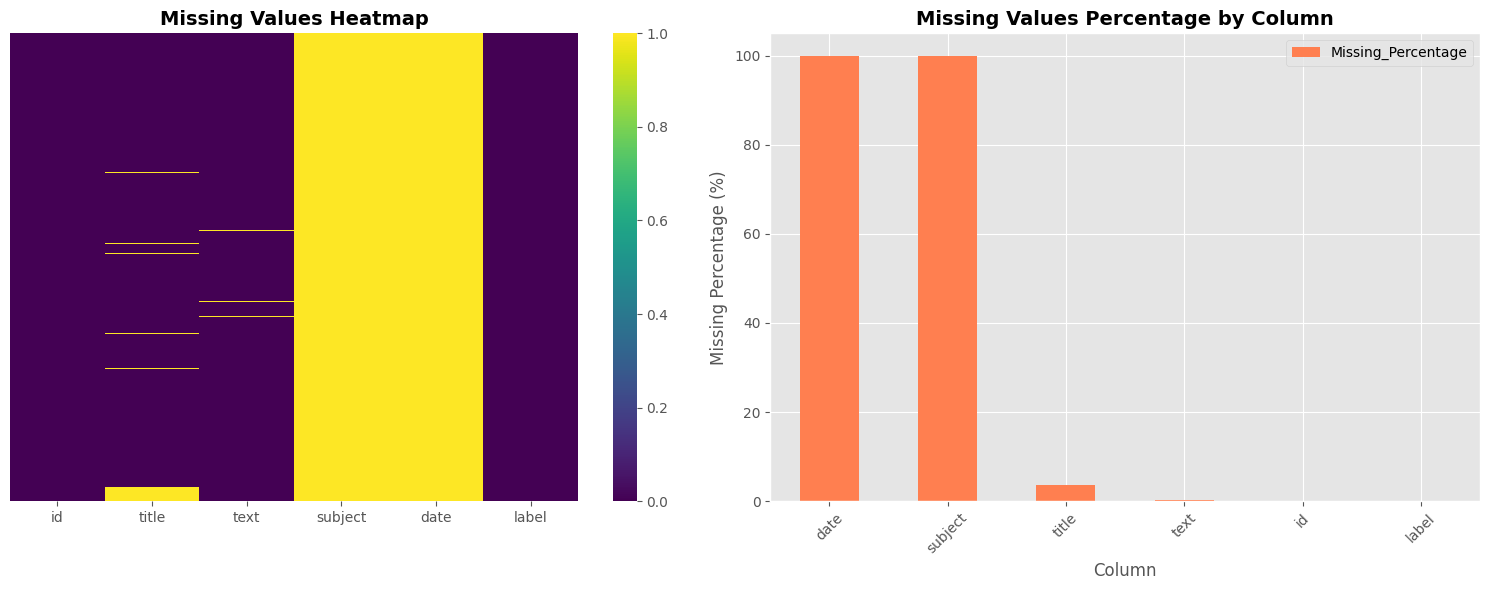

In [ ]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Missing values heatmap
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Missing Values Heatmap', fontsize=14, fontweight='bold')

# Missing values bar chart
missing_df.plot(x='Column', y='Missing_Percentage', kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Missing Percentage (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Calculating length of all texts and creating new features and visualize**

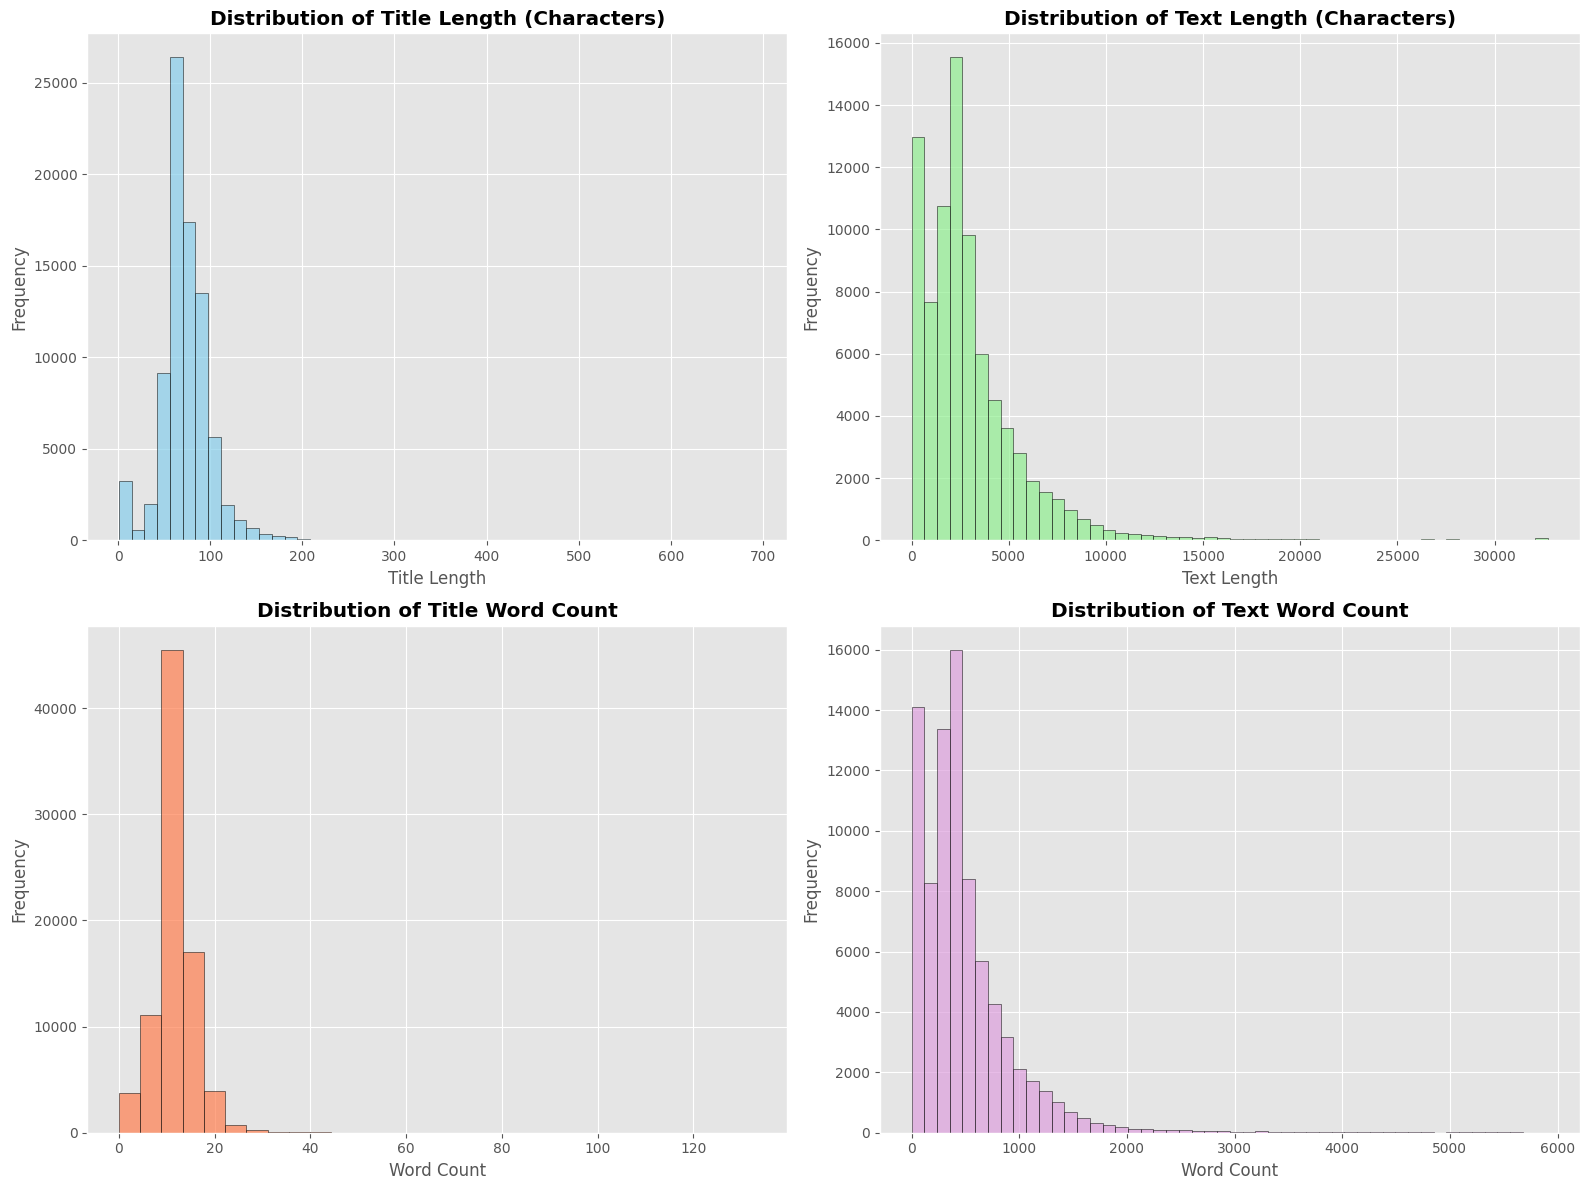

In [ ]:
# Calculate text lengths and create new features
df['title_length'] = df['title'].astype(str).str.len()
df['text_length'] = df['text'].astype(str).str.len()
df['title_word_count'] = df['title'].astype(str).str.split().str.len()
df['text_word_count'] = df['text'].astype(str).str.split().str.len()

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Title length distribution
axes[0,0].hist(df['title_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Title Length (Characters)', fontweight='bold')
axes[0,0].set_xlabel('Title Length')
axes[0,0].set_ylabel('Frequency')

# Text length distribution
axes[0,1].hist(df['text_length'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Distribution of Text Length (Characters)', fontweight='bold')
axes[0,1].set_xlabel('Text Length')
axes[0,1].set_ylabel('Frequency')

# Title word count distribution
axes[1,0].hist(df['title_word_count'], bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[1,0].set_title('Distribution of Title Word Count', fontweight='bold')
axes[1,0].set_xlabel('Word Count')
axes[1,0].set_ylabel('Frequency')

# Text word count distribution
axes[1,1].hist(df['text_word_count'], bins=50, alpha=0.7, color='plum', edgecolor='black')
axes[1,1].set_title('Distribution of Text Word Count', fontweight='bold')
axes[1,1].set_xlabel('Word Count')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Generating Word Cloud for fake news and real news**

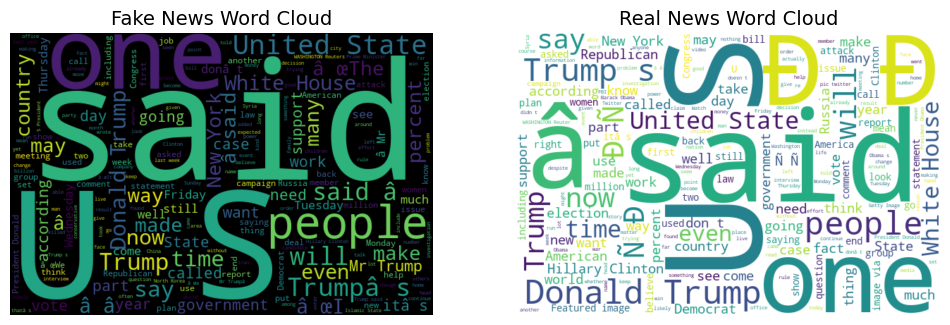

In [ ]:
# Generating Word Cloud
from wordcloud import WordCloud

fake_text = " ".join(df[df["label"]==0]["text"].astype(str).tolist())
real_text = " ".join(df[df["label"]==1]["text"].astype(str).tolist())

plt.figure(figsize=(12,6))
wc_fake = WordCloud(width=600, height=400, background_color="black").generate(fake_text)
plt.subplot(1,2,1)
plt.imshow(wc_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Fake News Word Cloud", fontsize=14)

wc_real = WordCloud(width=600, height=400, background_color="white").generate(real_text)
plt.subplot(1,2,2)
plt.imshow(wc_real, interpolation="bilinear")
plt.axis("off")
plt.title("Real News Word Cloud", fontsize=14)

plt.show()

**Getting Average length Stats and generating visualization**


Average Length Stats by Label:
        text_length  title_length
label                           
0      3275.291511     70.149370
1      2761.128631     75.917089


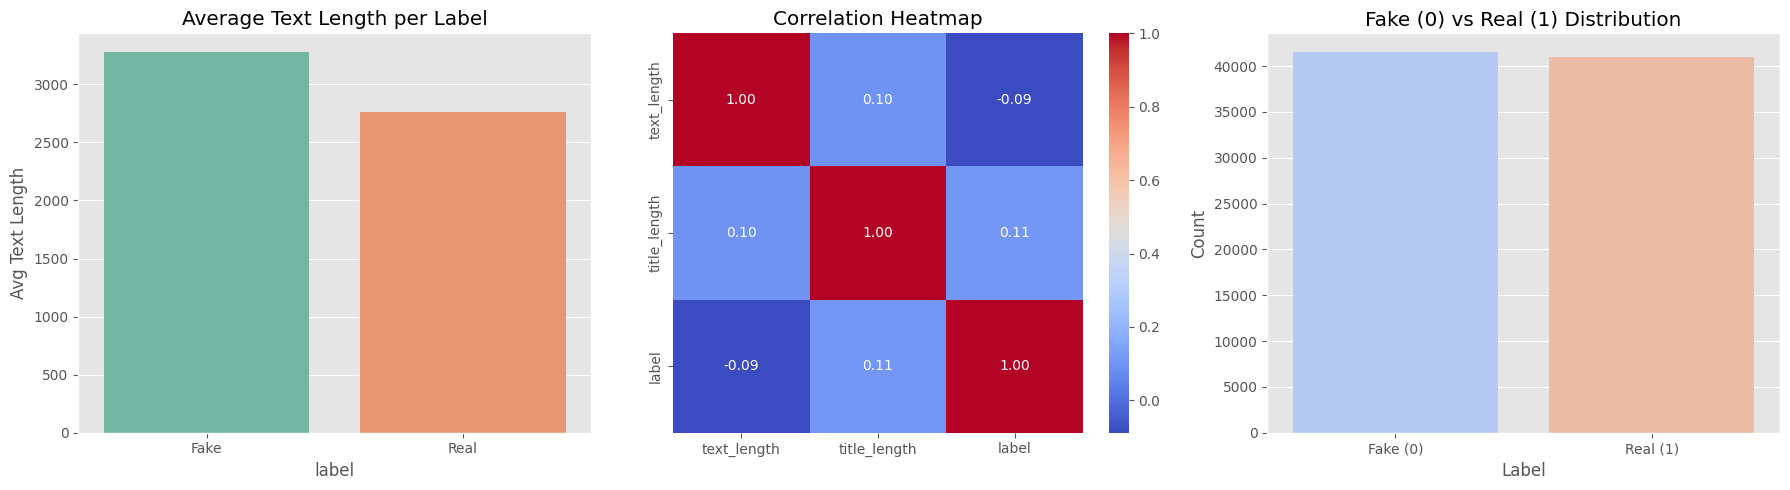

In [ ]:
# Average length stats
stats = df.groupby("label")[["text_length", "title_length"]].mean()
print("\nAverage Length Stats by Label:\n", stats)

# Create a figure with 3 subplots in one row
plt.figure(figsize=(18, 5))

# Plot 1: Average Text Length per Label
plt.subplot(1, 3, 1)
sns.barplot(x=stats.index, y=stats["text_length"], hue=stats.index, palette="Set2", legend=False)
plt.title("Average Text Length per Label")
plt.xticks([0, 1], ["Fake", "Real"])
plt.ylabel("Avg Text Length")

# Plot 2: Correlation Heatmap
plt.subplot(1, 3, 2)
corr_data = df[["text_length", "title_length", "label"]].corr()
sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

# Plot 3: Label Distribution
plt.subplot(1, 3, 3)
sns.countplot(x='label', data=df, hue='label', palette='coolwarm', legend=False)
plt.title("Fake (0) vs Real (1) Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks([0, 1], ["Fake (0)", "Real (1)"])

# Adjust layout and show all 3 side by side
plt.tight_layout()
plt.show()

**Compare text Length distribution by label**

COMPARING TEXT LENGTHS BY NEWS TYPE


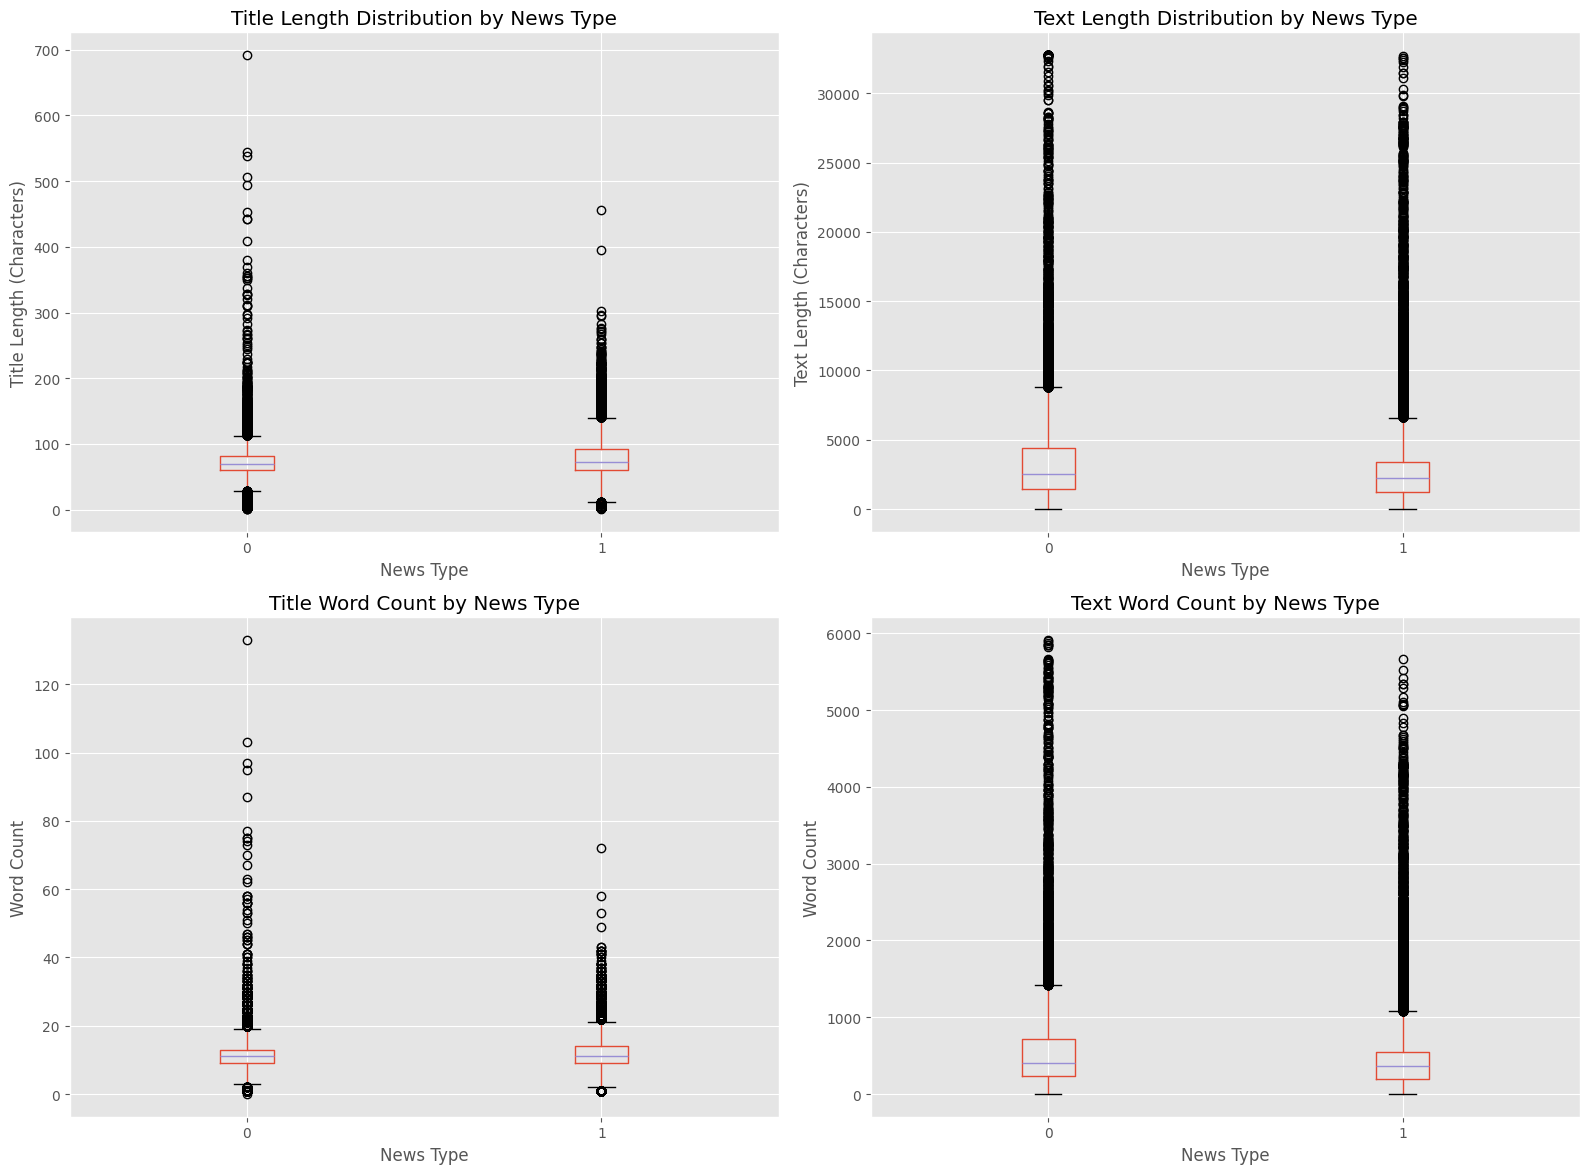


STATISTICAL COMPARISON BY LABEL:
----------------------------------------

0 News:
Average title length: 70.1 characters
Average text length: 3275.3 characters
Average title words: 11.2 words
Average text words: 536.5 words

1 News:
Average title length: 75.9 characters
Average text length: 2761.1 characters
Average title words: 11.7 words
Average text words: 450.0 words


In [ ]:
# Compare text length distributions by label (if label column exists)
if 'label' in df.columns:
    print("COMPARING TEXT LENGTHS BY NEWS TYPE")
    print("=" * 60)

    # Create box plots for text length comparison
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Title length by label
    df.boxplot(column='title_length', by='label', ax=axes[0,0])
    axes[0,0].set_title('Title Length Distribution by News Type')
    axes[0,0].set_xlabel('News Type')
    axes[0,0].set_ylabel('Title Length (Characters)')

    # Text length by label
    df.boxplot(column='text_length', by='label', ax=axes[0,1])
    axes[0,1].set_title('Text Length Distribution by News Type')
    axes[0,1].set_xlabel('News Type')
    axes[0,1].set_ylabel('Text Length (Characters)')

    # Title word count by label
    df.boxplot(column='title_word_count', by='label', ax=axes[1,0])
    axes[1,0].set_title('Title Word Count by News Type')
    axes[1,0].set_xlabel('News Type')
    axes[1,0].set_ylabel('Word Count')

    # Text word count by label
    df.boxplot(column='text_word_count', by='label', ax=axes[1,1])
    axes[1,1].set_title('Text Word Count by News Type')
    axes[1,1].set_xlabel('News Type')
    axes[1,1].set_ylabel('Word Count')

    plt.suptitle('')  # Remove the automatic title
    plt.tight_layout()
    plt.show()

    # Statistical comparison
    print("\nSTATISTICAL COMPARISON BY LABEL:")
    print("-" * 40)
    for label in df['label'].unique():
        print(f"\n{label} News:")
        subset = df[df['label'] == label]
        print(f"Average title length: {subset['title_length'].mean():.1f} characters")
        print(f"Average text length: {subset['text_length'].mean():.1f} characters")
        print(f"Average title words: {subset['title_word_count'].mean():.1f} words")
        print(f"Average text words: {subset['text_word_count'].mean():.1f} words")

**Label Distribution and Class balance**

LABEL DISTRIBUTION ANALYSIS
Label Distribution:
------------------------------
0: 41,501 (50.28%)
1: 41,032 (49.72%)


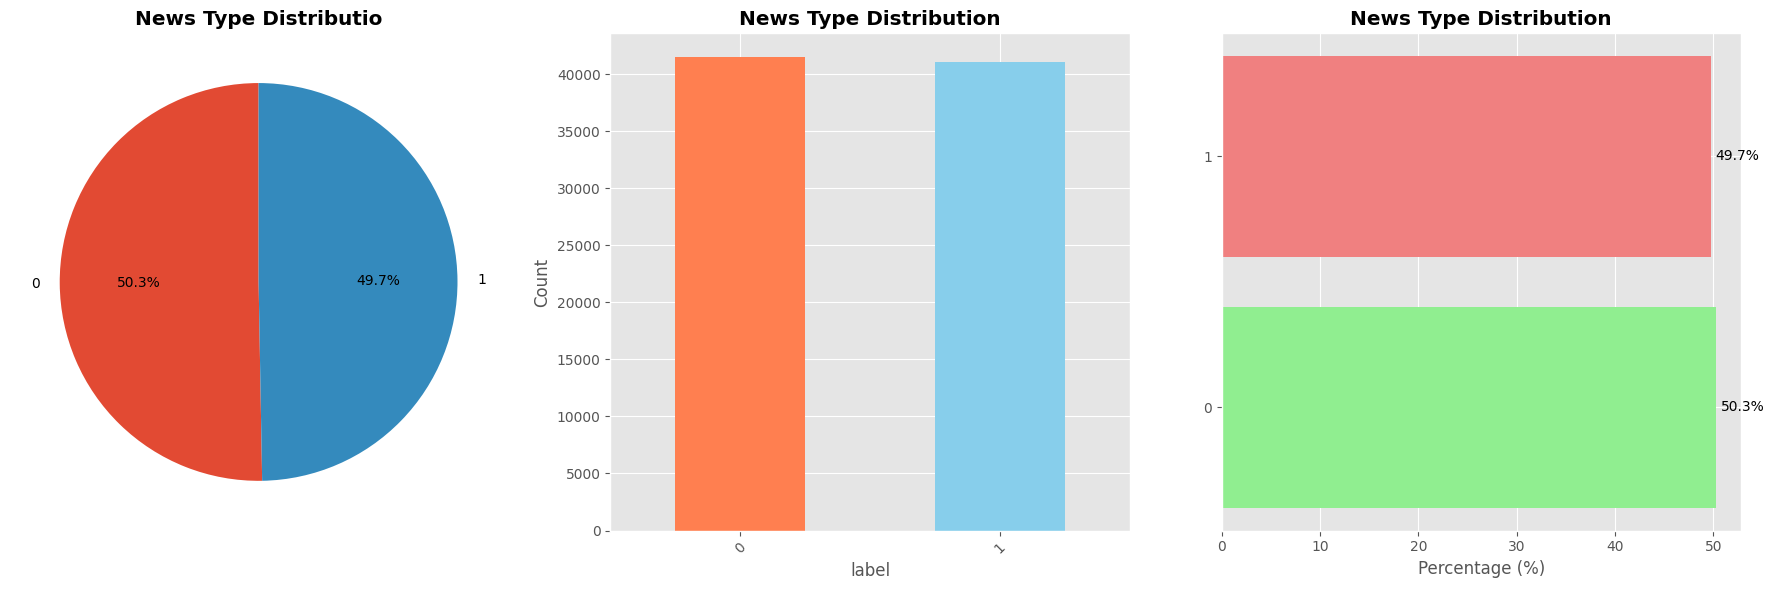


CLASS BALANCE ANALYSIS:
------------------------------
Minority class size: 41,032
Majority class size: 41,501
Imbalance ratio: 1.01:1
Dataset is relatively balanced


In [ ]:
# Analyze label distribution
if 'label' in df.columns:
    print("LABEL DISTRIBUTION ANALYSIS")
    print("=" * 60)

    # Count and percentage distribution
    label_counts = df['label'].value_counts()
    label_percentages = df['label'].value_counts(normalize=True) * 100

    print("Label Distribution:")
    print("-" * 30)
    for label in label_counts.index:
        print(f"{label}: {label_counts[label]:,} ({label_percentages[label]:.2f}%)")

    # Create visualizations
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Pie chart
    axes[0].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%',
                startangle=90)
    axes[0].set_title('News Type Distributio', fontweight='bold')

    # Bar chart
    label_counts.plot(kind='bar', ax=axes[1], color=['coral', 'skyblue'])
    axes[1].set_title('News Type Distribution', fontweight='bold')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)

    # Horizontal bar chart with percentages
    axes[2].barh(range(len(label_percentages)), label_percentages.values,
                 color=['lightgreen', 'lightcoral'])
    axes[2].set_yticks(range(len(label_percentages)))
    axes[2].set_yticklabels(label_percentages.index)
    axes[2].set_xlabel('Percentage (%)')
    axes[2].set_title('News Type Distribution', fontweight='bold')

    # Add percentage labels on bars
    for i, v in enumerate(label_percentages.values):
        axes[2].text(v + 0.5, i, f'{v:.1f}%', va='center')

    plt.tight_layout()
    plt.show()

    # Class balance analysis
    print(f"\nCLASS BALANCE ANALYSIS:")
    print("-" * 30)
    minority_class = label_counts.min()
    majority_class = label_counts.max()
    imbalance_ratio = majority_class / minority_class

    print(f"Minority class size: {minority_class:,}")
    print(f"Majority class size: {majority_class:,}")
    print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

    if imbalance_ratio > 1.5:
        print("Dataset shows class imbalance - consider sampling techniques")
    else:
        print("Dataset is relatively balanced")

else:
    print("No 'label' column found in the dataset")
    print("Available columns:", df.columns.tolist())

**Word Frequency Analysis**

In [ ]:
# Sentiment analysis and text statistics
from textblob import TextBlob
import textstat
# Download required NLTK data
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('vader_lexicon', quiet=True)
except:
    print("NLTK data download failed - some features may not work")

# Set up plotting parameters
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Prepare text for analysis
def preprocess_text_basic(text):
    """Basic text preprocessing for word frequency analysis"""
    if pd.isna(text):
        return ""

    # Convert to lowercase and remove special characters
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize and remove stopwords
    try:
        stop_words = set(stopwords.words('english'))
        words = word_tokenize(text)
        words = [word for word in words if word not in stop_words and len(word) > 2]
        return ' '.join(words)
    except:
        # If NLTK data not available, do basic processing
        words = text.split()
        common_stopwords = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must', 'can', 'this', 'that', 'these', 'those'}
        words = [word for word in words if word not in common_stopwords and len(word) > 2]
        return ' '.join(words)

print("WORD FREQUENCY ANALYSIS")
print("=" * 60)

# Preprocess text data
print("Preprocessing text data...")
df['title_clean'] = df['title'].apply(preprocess_text_basic)
df['text_clean'] = df['text'].apply(preprocess_text_basic)

# Combine all text for overall analysis
all_text = ' '.join(df['text_clean'].fillna('') + ' ' + df['title_clean'].fillna(''))
all_words = all_text.split()

# Get word frequency
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)

print(f"Total unique words: {len(word_freq):,}")
print(f"Total words: {len(all_words):,}")

# Create word frequency visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 20 most common words
words, counts = zip(*most_common_words)
axes[0].barh(range(len(words)), counts, color='lightblue')
axes[0].set_yticks(range(len(words)))
axes[0].set_yticklabels(words)
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 20 Most Common Words', fontweight='bold')
axes[0].invert_yaxis()

# Word cloud
if len(all_text) > 0:
    try:
        wordcloud = WordCloud(width=800, height=400, background_color='white',
                             max_words=100, colormap='viridis').generate(all_text)
        axes[1].imshow(wordcloud, interpolation='bilinear')
        axes[1].axis('off')
        axes[1].set_title('Word Cloud - All News Articles', fontweight='bold')
    except Exception as e:
        axes[1].text(0.5, 0.5, f'Word cloud generation failed:\n{str(e)}',
                    ha='center', va='center', transform=axes[1].transAxes)
        axes[1].set_title('Word Cloud - Generation Failed', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTOP 20 MOST COMMON WORDS:")
print("-" * 30)
for i, (word, count) in enumerate(most_common_words, 1):
    print(f"{i:2d}. {word:15} : {count:,}")

WORD FREQUENCY ANALYSIS
Preprocessing text data...


NameError: name 'Counter' is not defined

## 3. Text Preprocessing and Cleaning

In [ ]:
# Advanced text preprocessing functions
def advanced_text_preprocessing(text):
    """Comprehensive text preprocessing for NLP analysis"""
    if pd.isna(text):
        return ""

    # Convert to string and lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    try:
        # Tokenization
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Remove words with less than 3 characters
        tokens = [word for word in tokens if len(word) >= 3]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        return ' '.join(tokens)

    except Exception as e:
        # Fallback processing if NLTK components fail
        words = text.split()
        common_stopwords = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by'}
        words = [word for word in words if word not in common_stopwords and len(word) >= 3]
        return ' '.join(words)

print("ADVANCED TEXT PREPROCESSING")
print("=" * 60)

# Show examples of text preprocessing
sample_texts = df['text'].dropna().head(3).tolist()

print("BEFORE AND AFTER PREPROCESSING EXAMPLES:")
print("-" * 50)

for i, text in enumerate(sample_texts, 1):
    print(f"\nExample {i}:")
    print("ORIGINAL:")
    print(text[:200] + "..." if len(text) > 200 else text)

    processed = advanced_text_preprocessing(text)
    print("\nPROCESSED:")
    print(processed[:200] + "..." if len(processed) > 200 else processed)
    print("-" * 50)

# Apply advanced preprocessing to the dataset
print("\nApplying advanced preprocessing to the entire dataset...")
df['title_processed'] = df['title'].apply(advanced_text_preprocessing)
df['text_processed'] = df['text'].apply(advanced_text_preprocessing)

# Calculate processing statistics
original_title_chars = df['title'].astype(str).str.len().sum()
processed_title_chars = df['title_processed'].str.len().sum()
original_text_chars = df['text'].astype(str).str.len().sum()
processed_text_chars = df['text_processed'].str.len().sum()

print(f"\nPREPROCESSING STATISTICS:")
print("-" * 30)
print(f"Title characters - Original: {original_title_chars:,}, Processed: {processed_title_chars:,}")
print(f"Text characters - Original: {original_text_chars:,}, Processed: {processed_text_chars:,}")
print(f"Title reduction: {((original_title_chars - processed_title_chars) / original_title_chars * 100):.1f}%")
print(f"Text reduction: {((original_text_chars - processed_text_chars) / original_text_chars * 100):.1f}%")

ADVANCED TEXT PREPROCESSING
BEFORE AND AFTER PREPROCESSING EXAMPLES:
--------------------------------------------------

Example 1:
ORIGINAL:
A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from ...

PROCESSED:
dozen politically active pastors came here private dinner friday night hear conversion story unique context presidential politics how louisiana gov bobby jindal traveled from hinduism protestant chris...
--------------------------------------------------

Example 2:
ORIGINAL:
BRUSSELS (Reuters) - British Prime Minister Theresa May s offer of  settled status  for EU residents is flawed and will leave them with fewer rights after Brexit, the European Parliament s Brexit coor...

PROCESSED:
brussels reuters british prime minister theresa may offer settled status residents flawed will leave them fewer rights after brexit european parliame

## 4. N-gram Analysis (Unigrams, Bigrams, Trigrams)

N-GRAM ANALYSIS


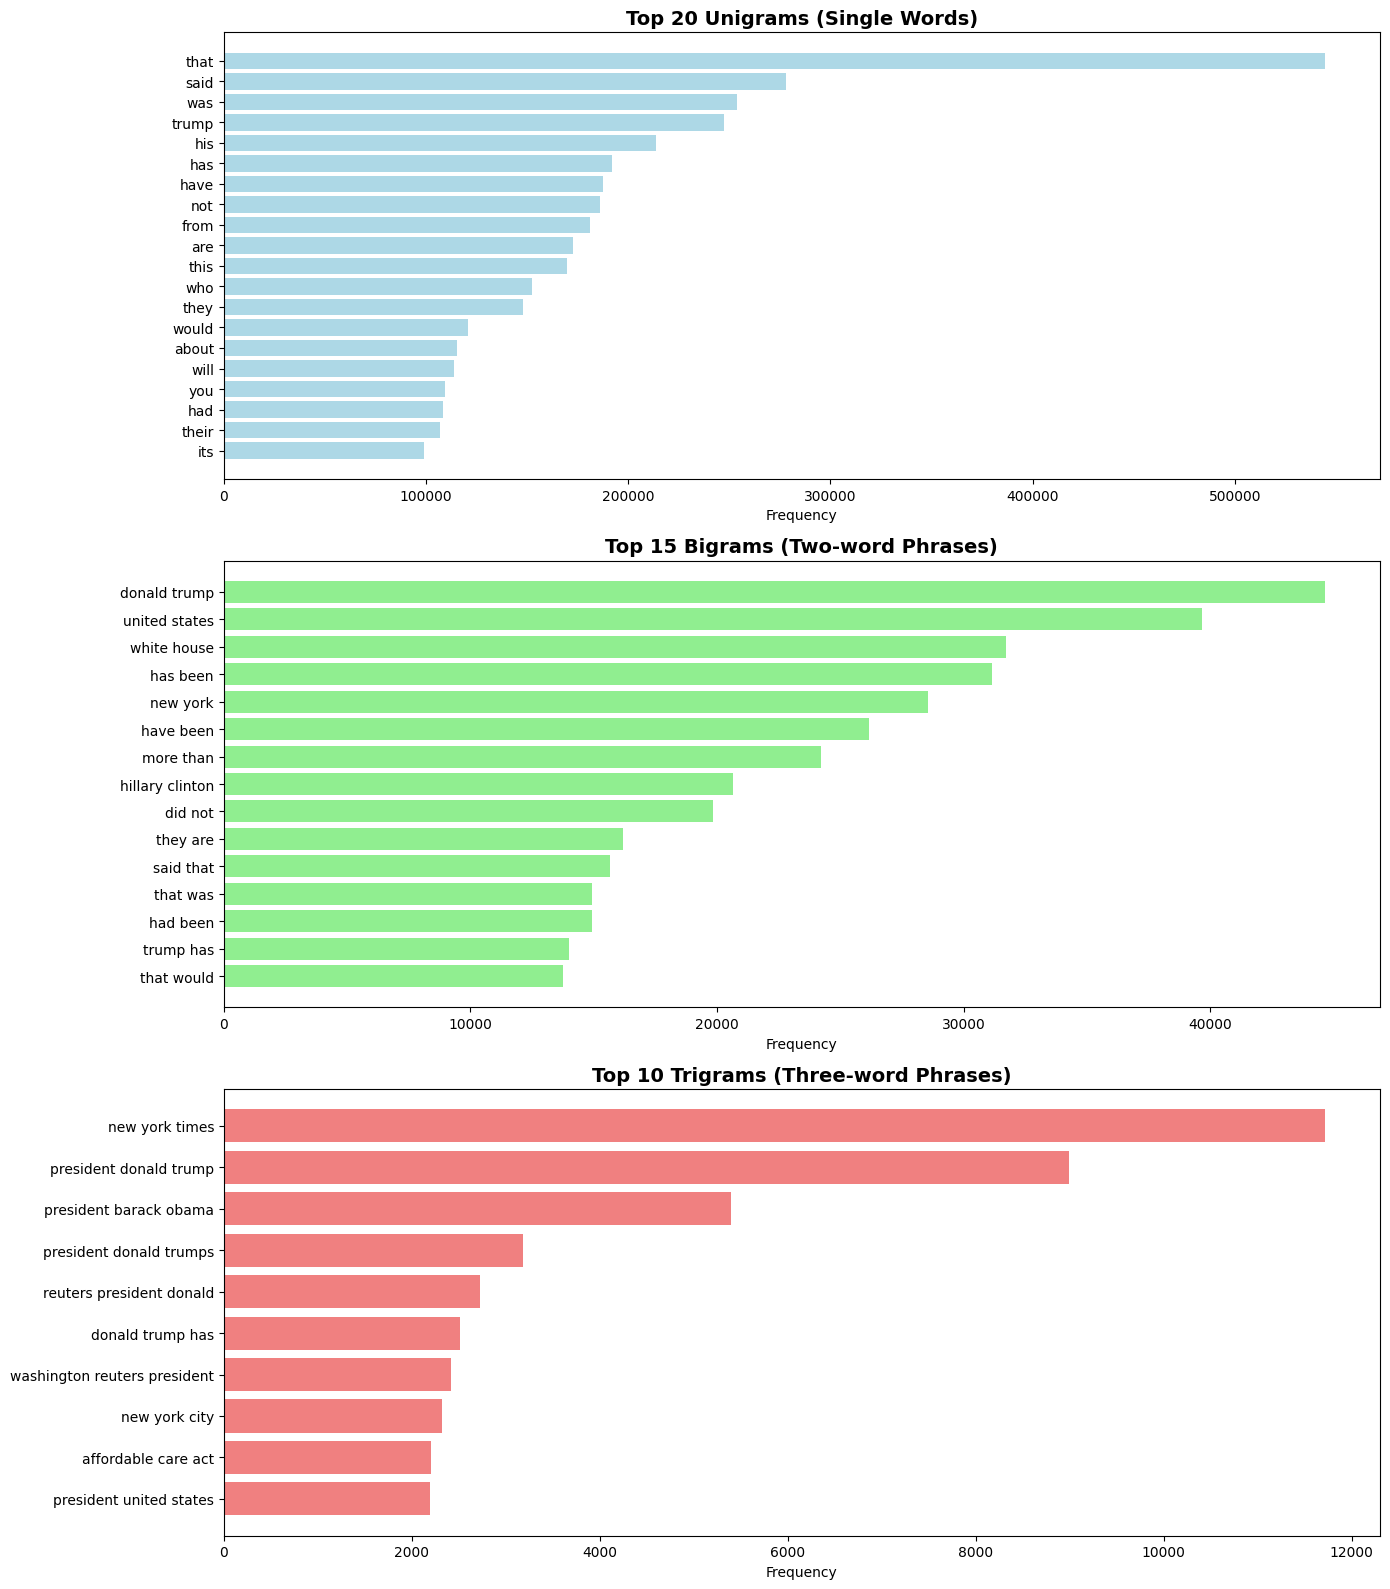

TOP UNIGRAMS:
------------------------------
 1. that                 : 544,559
 2. said                 : 278,279
 3. was                  : 253,997
 4. trump                : 247,489
 5. his                  : 213,898
 6. has                  : 192,095
 7. have                 : 187,425
 8. not                  : 186,128
 9. from                 : 181,151
10. are                  : 172,911
11. this                 : 169,891
12. who                  : 152,329
13. they                 : 148,216
14. would                : 120,725
15. about                : 115,427

TOP BIGRAMS:
------------------------------
 1. donald trump                   : 44,646
 2. united states                  : 39,669
 3. white house                    : 31,717
 4. has been                       : 31,162
 5. new york                       : 28,570
 6. have been                      : 26,146
 7. more than                      : 24,220
 8. hillary clinton                : 20,645
 9. did not                      

In [ ]:
# N-gram analysis functions
from collections import defaultdict

def get_ngrams(text, n):
    """Extract n-grams from text"""
    words = text.split()
    if len(words) < n:
        return []
    return [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]

def analyze_ngrams(text_series, n, top_k=15):
    """Analyze n-grams in a text series"""
    all_ngrams = []
    for text in text_series.fillna(''):
        all_ngrams.extend(get_ngrams(text, n))

    ngram_freq = Counter(all_ngrams)
    return ngram_freq.most_common(top_k)

print("N-GRAM ANALYSIS")
print("=" * 60)

# Combine all processed text
all_processed_text = df['text_processed'].fillna('') + ' ' + df['title_processed'].fillna('')

# Analyze unigrams, bigrams, and trigrams
unigrams = analyze_ngrams(all_processed_text, 1, 20)
bigrams = analyze_ngrams(all_processed_text, 2, 15)
trigrams = analyze_ngrams(all_processed_text, 3, 10)

# Create visualizations
fig, axes = plt.subplots(3, 1, figsize=(14, 16))

# Unigrams
if unigrams:
    words, counts = zip(*unigrams)
    axes[0].barh(range(len(words)), counts, color='lightblue')
    axes[0].set_yticks(range(len(words)))
    axes[0].set_yticklabels(words)
    axes[0].set_xlabel('Frequency')
    axes[0].set_title('Top 20 Unigrams (Single Words)', fontweight='bold', fontsize=14)
    axes[0].invert_yaxis()

# Bigrams
if bigrams:
    words, counts = zip(*bigrams)
    axes[1].barh(range(len(words)), counts, color='lightgreen')
    axes[1].set_yticks(range(len(words)))
    axes[1].set_yticklabels(words)
    axes[1].set_xlabel('Frequency')
    axes[1].set_title('Top 15 Bigrams (Two-word Phrases)', fontweight='bold', fontsize=14)
    axes[1].invert_yaxis()

# Trigrams
if trigrams:
    words, counts = zip(*trigrams)
    axes[2].barh(range(len(words)), counts, color='lightcoral')
    axes[2].set_yticks(range(len(words)))
    axes[2].set_yticklabels(words)
    axes[2].set_xlabel('Frequency')
    axes[2].set_title('Top 10 Trigrams (Three-word Phrases)', fontweight='bold', fontsize=14)
    axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

# Print results
print("TOP UNIGRAMS:")
print("-" * 30)
for i, (gram, count) in enumerate(unigrams[:15], 1):
    print(f"{i:2d}. {gram:20} : {count:,}")

print(f"\nTOP BIGRAMS:")
print("-" * 30)
for i, (gram, count) in enumerate(bigrams[:10], 1):
    print(f"{i:2d}. {gram:30} : {count:,}")

print(f"\nTOP TRIGRAMS:")
print("-" * 30)
for i, (gram, count) in enumerate(trigrams[:10], 1):
    print(f"{i:2d}. {gram:40} : {count:,}")

## 5. Sentiment Analysis Distribution

SENTIMENT ANALYSIS
Calculating sentiment scores...


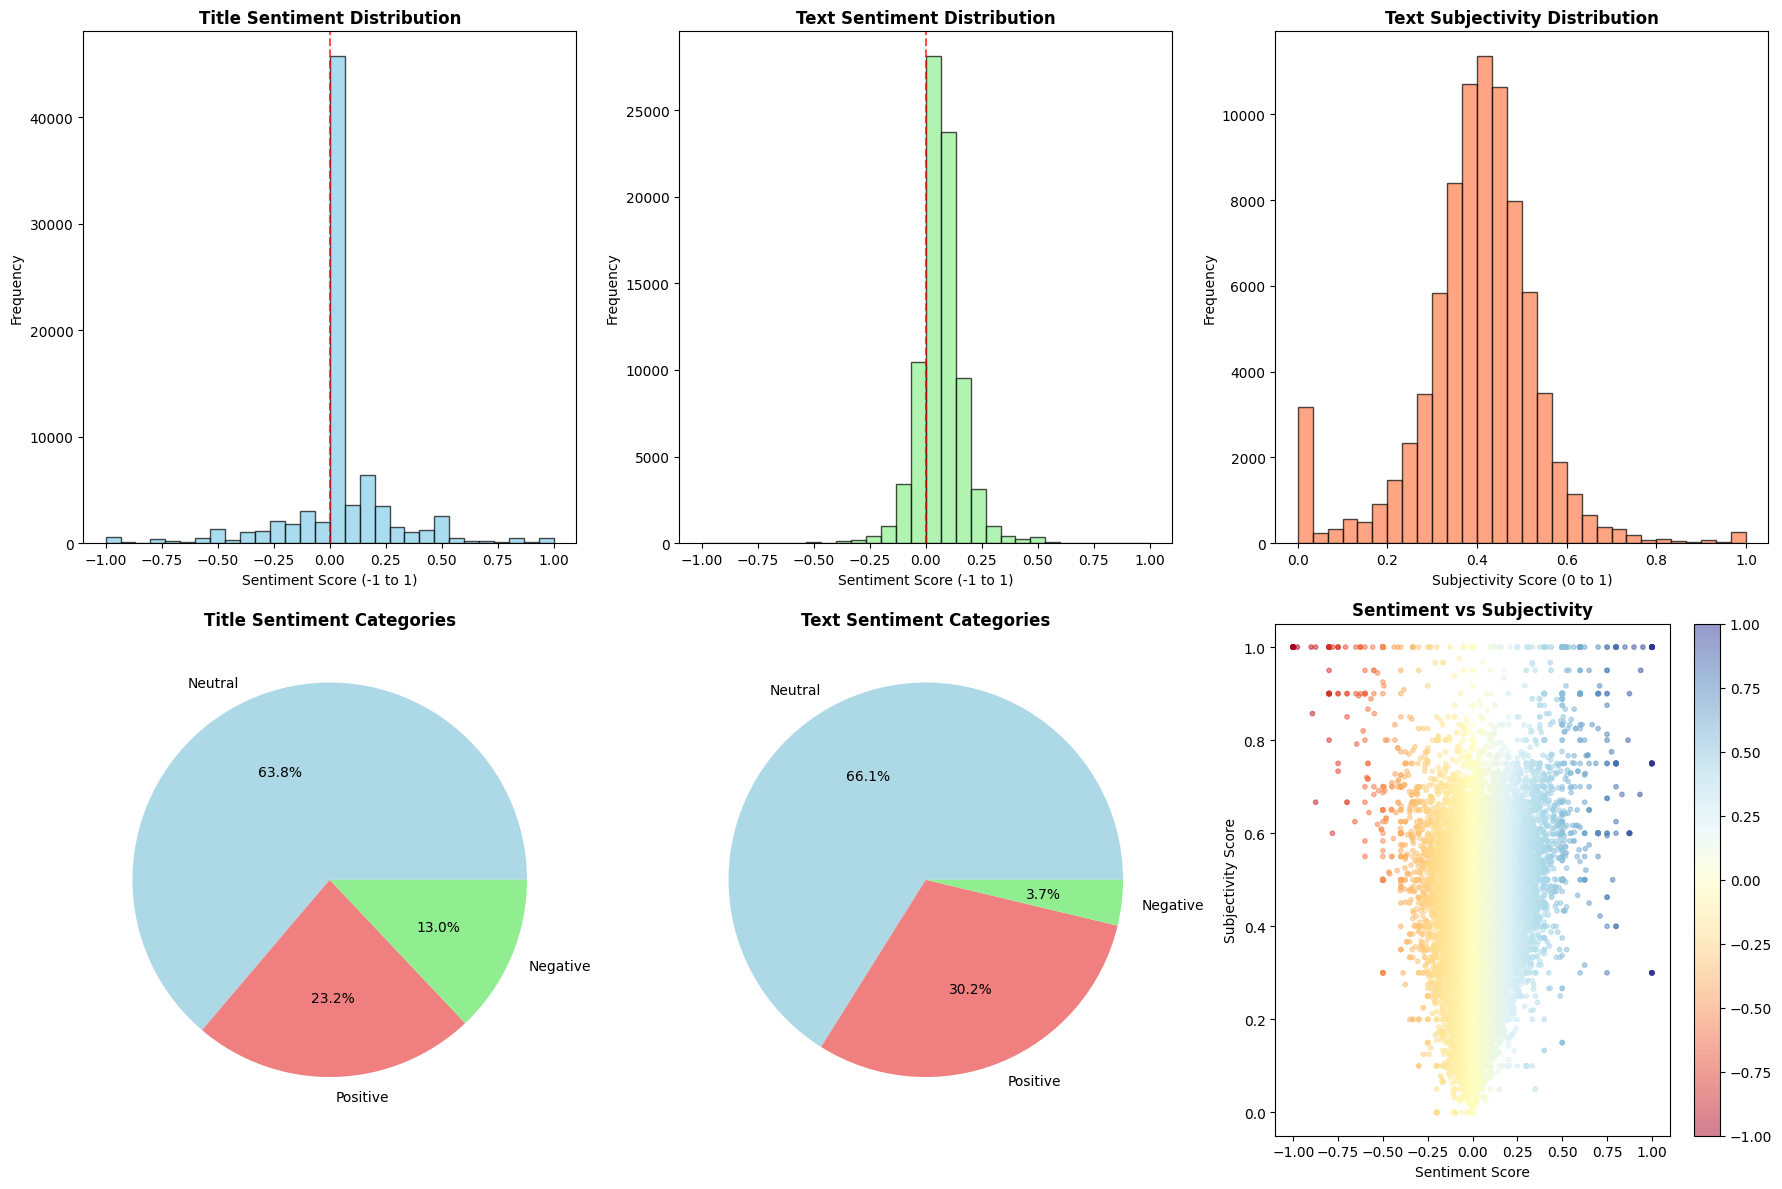

SENTIMENT ANALYSIS STATISTICS:
----------------------------------------
Title Sentiment - Mean: 0.026, Std: 0.240
Text Sentiment - Mean: 0.063, Std: 0.107
Text Subjectivity - Mean: 0.398, Std: 0.137

TITLE SENTIMENT CATEGORIES:
title_sentiment_category
Neutral     52651
Positive    19188
Negative    10694
Name: count, dtype: int64

TEXT SENTIMENT CATEGORIES:
text_sentiment_category
Neutral     54550
Positive    24899
Negative     3084
Name: count, dtype: int64


In [ ]:
# Sentiment analysis using TextBlob
def get_sentiment_score(text):
    """Calculate sentiment polarity using TextBlob"""
    if pd.isna(text) or text == "":
        return 0
    try:
        blob = TextBlob(str(text))
        return blob.sentiment.polarity
    except:
        return 0

def get_subjectivity_score(text):
    """Calculate subjectivity using TextBlob"""
    if pd.isna(text) or text == "":
        return 0
    try:
        blob = TextBlob(str(text))
        return blob.sentiment.subjectivity
    except:
        return 0

def categorize_sentiment(score):
    """Categorize sentiment score"""
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

print("SENTIMENT ANALYSIS")
print("=" * 60)

# Calculate sentiment scores
print("Calculating sentiment scores...")
df['title_sentiment'] = df['title'].apply(get_sentiment_score)
df['text_sentiment'] = df['text'].apply(get_sentiment_score)
df['title_subjectivity'] = df['title'].apply(get_subjectivity_score)
df['text_subjectivity'] = df['text'].apply(get_subjectivity_score)

# Categorize sentiments
df['title_sentiment_category'] = df['title_sentiment'].apply(categorize_sentiment)
df['text_sentiment_category'] = df['text_sentiment'].apply(categorize_sentiment)

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Sentiment score distributions
axes[0,0].hist(df['title_sentiment'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Title Sentiment Distribution', fontweight='bold')
axes[0,0].set_xlabel('Sentiment Score (-1 to 1)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(x=0, color='red', linestyle='--', alpha=0.7)

axes[0,1].hist(df['text_sentiment'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Text Sentiment Distribution', fontweight='bold')
axes[0,1].set_xlabel('Sentiment Score (-1 to 1)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(x=0, color='red', linestyle='--', alpha=0.7)

# Subjectivity distributions
axes[0,2].hist(df['text_subjectivity'], bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[0,2].set_title('Text Subjectivity Distribution', fontweight='bold')
axes[0,2].set_xlabel('Subjectivity Score (0 to 1)')
axes[0,2].set_ylabel('Frequency')

# Sentiment categories
title_sent_counts = df['title_sentiment_category'].value_counts()
axes[1,0].pie(title_sent_counts.values, labels=title_sent_counts.index, autopct='%1.1f%%',
              colors=['lightblue', 'lightcoral', 'lightgreen'])
axes[1,0].set_title('Title Sentiment Categories', fontweight='bold')

text_sent_counts = df['text_sentiment_category'].value_counts()
axes[1,1].pie(text_sent_counts.values, labels=text_sent_counts.index, autopct='%1.1f%%',
              colors=['lightblue', 'lightcoral', 'lightgreen'])
axes[1,1].set_title('Text Sentiment Categories', fontweight='bold')

# Sentiment vs Subjectivity scatter plot
scatter = axes[1,2].scatter(df['text_sentiment'], df['text_subjectivity'],
                           alpha=0.5, c=df['text_sentiment'], cmap='RdYlBu', s=10)
axes[1,2].set_xlabel('Sentiment Score')
axes[1,2].set_ylabel('Subjectivity Score')
axes[1,2].set_title('Sentiment vs Subjectivity', fontweight='bold')
plt.colorbar(scatter, ax=axes[1,2])

plt.tight_layout()
plt.show()

# Print sentiment statistics
print("SENTIMENT ANALYSIS STATISTICS:")
print("-" * 40)
print(f"Title Sentiment - Mean: {df['title_sentiment'].mean():.3f}, Std: {df['title_sentiment'].std():.3f}")
print(f"Text Sentiment - Mean: {df['text_sentiment'].mean():.3f}, Std: {df['text_sentiment'].std():.3f}")
print(f"Text Subjectivity - Mean: {df['text_subjectivity'].mean():.3f}, Std: {df['text_subjectivity'].std():.3f}")

print(f"\nTITLE SENTIMENT CATEGORIES:")
print(title_sent_counts)

print(f"\nTEXT SENTIMENT CATEGORIES:")
print(text_sent_counts)

SENTIMENT COMPARISON BY NEWS TYPE


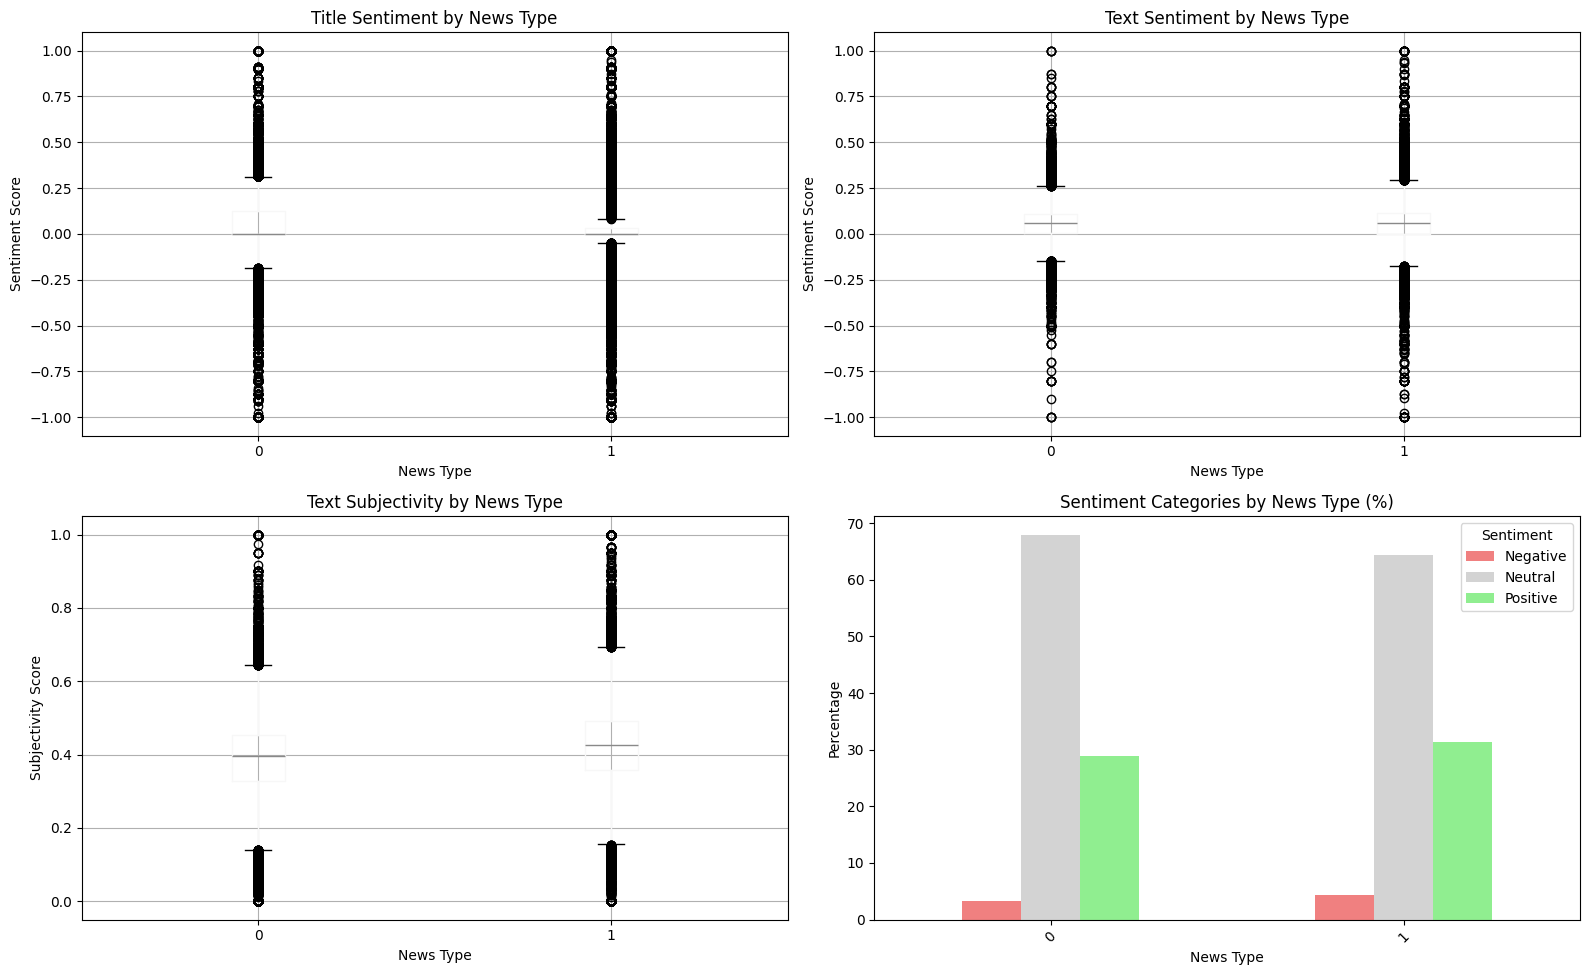

SENTIMENT STATISTICS BY LABEL:
----------------------------------------

0 News:
  Title sentiment - Mean: 0.034
  Text sentiment - Mean: 0.061
  Text subjectivity - Mean: 0.384
  Sentiment categories:
    Neutral: 28,146 (67.8%)
    Positive: 12,020 (29.0%)
    Negative: 1,335 (3.2%)

1 News:
  Title sentiment - Mean: 0.017
  Text sentiment - Mean: 0.065
  Text subjectivity - Mean: 0.413
  Sentiment categories:
    Neutral: 26,404 (64.3%)
    Positive: 12,879 (31.4%)
    Negative: 1,749 (4.3%)


In [ ]:
# Compare sentiment between fake and real news (if label exists)
if 'label' in df.columns:
    print("SENTIMENT COMPARISON BY NEWS TYPE")
    print("=" * 60)

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    # Box plots for sentiment comparison
    df.boxplot(column='title_sentiment', by='label', ax=axes[0,0])
    axes[0,0].set_title('Title Sentiment by News Type')
    axes[0,0].set_xlabel('News Type')
    axes[0,0].set_ylabel('Sentiment Score')

    df.boxplot(column='text_sentiment', by='label', ax=axes[0,1])
    axes[0,1].set_title('Text Sentiment by News Type')
    axes[0,1].set_xlabel('News Type')
    axes[0,1].set_ylabel('Sentiment Score')

    df.boxplot(column='text_subjectivity', by='label', ax=axes[1,0])
    axes[1,0].set_title('Text Subjectivity by News Type')
    axes[1,0].set_xlabel('News Type')
    axes[1,0].set_ylabel('Subjectivity Score')

    # Sentiment category comparison
    sentiment_cross = pd.crosstab(df['label'], df['text_sentiment_category'])
    sentiment_cross_pct = pd.crosstab(df['label'], df['text_sentiment_category'], normalize='index') * 100

    sentiment_cross_pct.plot(kind='bar', ax=axes[1,1], color=['lightcoral', 'lightgray', 'lightgreen'])
    axes[1,1].set_title('Sentiment Categories by News Type (%)')
    axes[1,1].set_xlabel('News Type')
    axes[1,1].set_ylabel('Percentage')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].legend(title='Sentiment')

    plt.suptitle('')  # Remove automatic title
    plt.tight_layout()
    plt.show()

    # Statistical comparison
    print("SENTIMENT STATISTICS BY LABEL:")
    print("-" * 40)
    for label in df['label'].unique():
        subset = df[df['label'] == label]
        print(f"\n{label} News:")
        print(f"  Title sentiment - Mean: {subset['title_sentiment'].mean():.3f}")
        print(f"  Text sentiment - Mean: {subset['text_sentiment'].mean():.3f}")
        print(f"  Text subjectivity - Mean: {subset['text_subjectivity'].mean():.3f}")

        print(f"  Sentiment categories:")
        categories = subset['text_sentiment_category'].value_counts()
        for cat, count in categories.items():
            pct = (count / len(subset)) * 100
            print(f"    {cat}: {count:,} ({pct:.1f}%)")

## 6. Text Complexity Metrics

TEXT COMPLEXITY ANALYSIS
Calculating text complexity metrics...


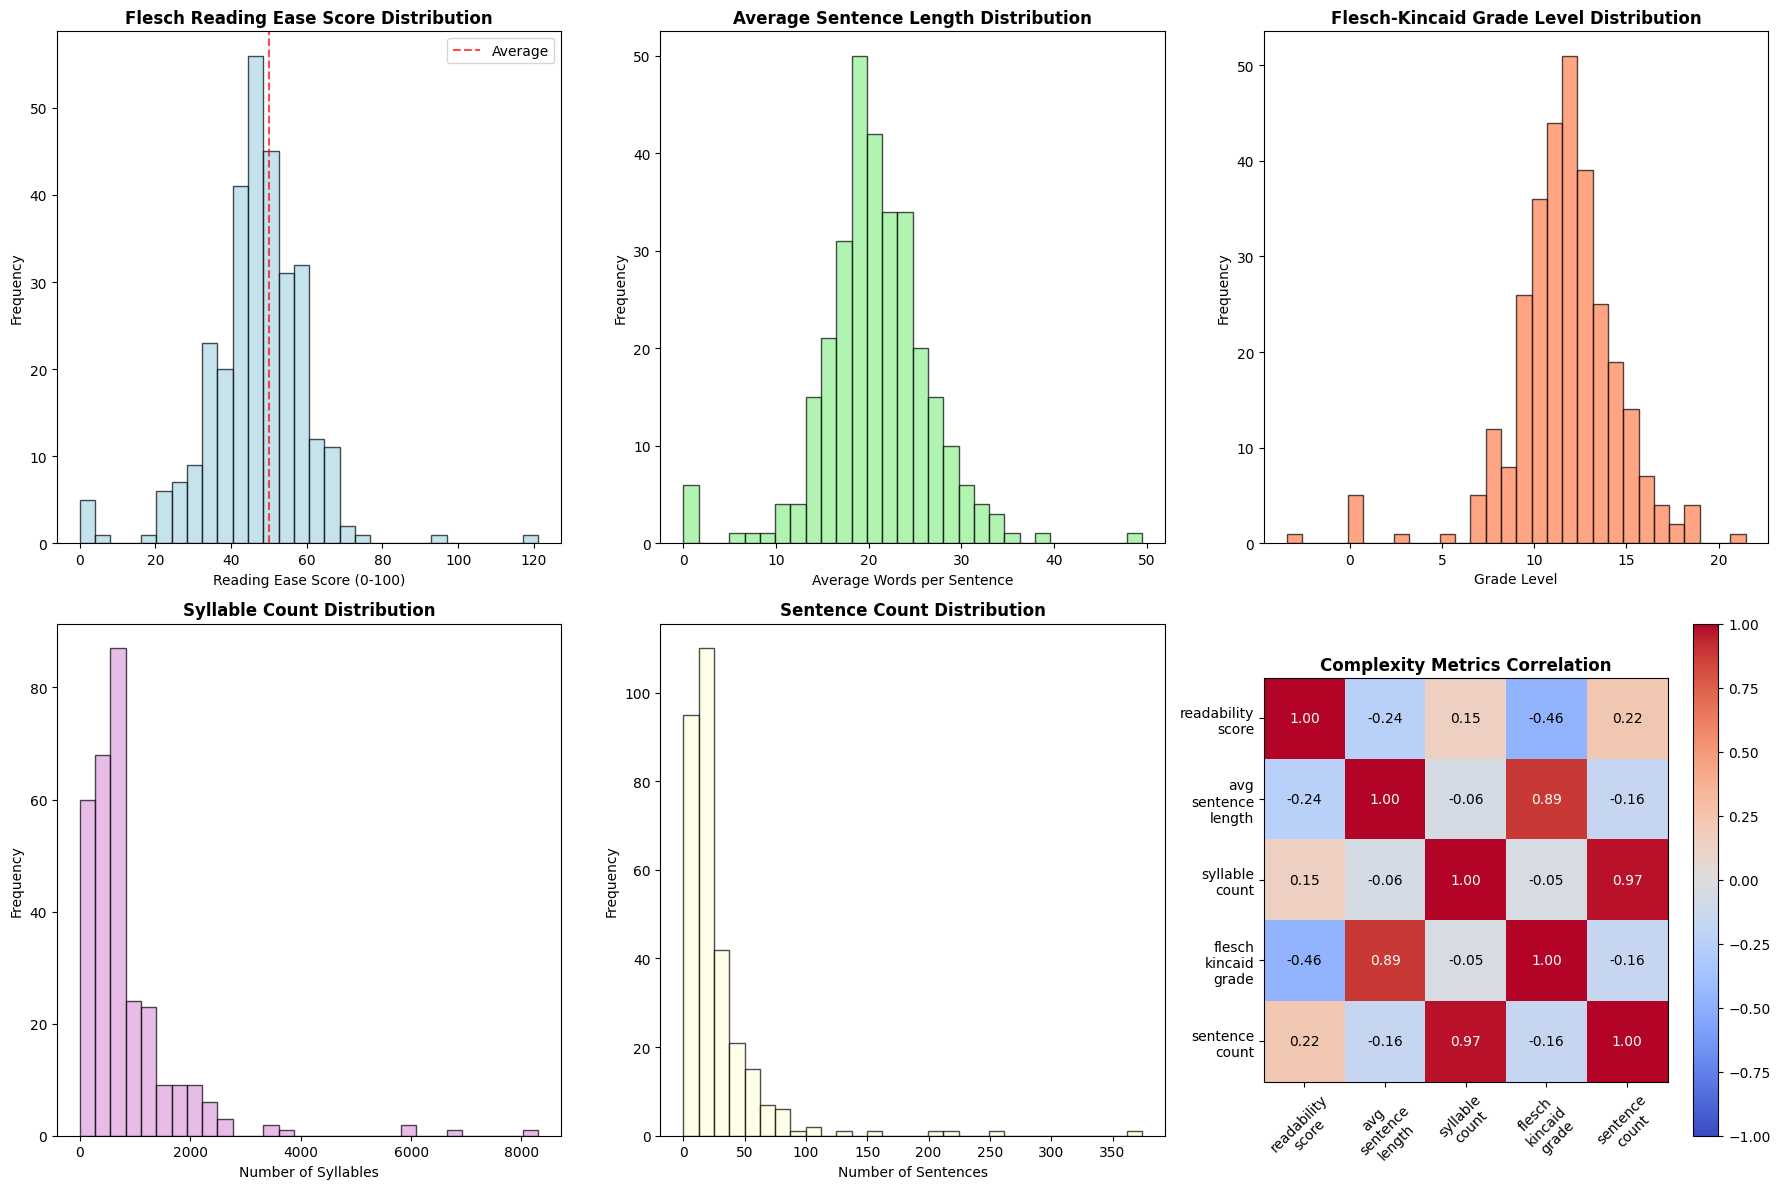

COMPLEXITY METRICS STATISTICS (Sample of 5,000 articles):
------------------------------------------------------------
       readability_score  avg_sentence_length  syllable_count  \
count         305.000000           305.000000      305.000000   
mean           46.871948            20.727264      837.544262   
std            13.082079             5.876710      932.242694   
min             0.000000             0.000000        0.000000   
25%            41.031151            17.851852      378.000000   
50%            47.503622            20.705882      623.000000   
75%            54.363782            23.777778      990.000000   
max           121.220000            49.500000     8307.000000   

       flesch_kincaid_grade  sentence_count  
count            305.000000      305.000000  
mean              11.628116       26.714754  
std                2.980979       35.749870  
min               -3.400000        0.000000  
25%               10.156082       10.000000  
50%               1

In [ ]:
# Calculate text complexity metrics
def safe_textstat_metric(text, metric_func, default_value=0):
    """Safely calculate textstat metrics with error handling"""
    try:
        if pd.isna(text) or text == "":
            return default_value
        return metric_func(str(text))
    except:
        return default_value

def calculate_complexity_metrics(text):
    """Calculate various text complexity metrics"""
    if pd.isna(text) or text == "":
        return {
            'readability_score': 0,
            'avg_sentence_length': 0,
            'syllable_count': 0,
            'flesch_kincaid_grade': 0,
            'sentence_count': 0
        }

    text_str = str(text)

    try:
        # Use textstat if available
        readability = safe_textstat_metric(text_str, textstat.flesch_reading_ease, 0)
        fk_grade = safe_textstat_metric(text_str, textstat.flesch_kincaid_grade, 0)
        syllables = safe_textstat_metric(text_str, textstat.syllable_count, 0)
        sentences = safe_textstat_metric(text_str, textstat.sentence_count, 1)

        # Calculate average sentence length
        words = len(text_str.split())
        avg_sent_length = words / sentences if sentences > 0 else 0

    except:
        # Fallback calculations
        sentences = text_str.count('.') + text_str.count('!') + text_str.count('?')
        sentences = max(sentences, 1)
        words = len(text_str.split())

        readability = 50  # Default neutral score
        fk_grade = 8     # Default grade level
        syllables = words * 1.5  # Rough estimate
        avg_sent_length = words / sentences

    return {
        'readability_score': readability,
        'avg_sentence_length': avg_sent_length,
        'syllable_count': syllables,
        'flesch_kincaid_grade': fk_grade,
        'sentence_count': sentences
    }

print("TEXT COMPLEXITY ANALYSIS")
print("=" * 60)

print("Calculating text complexity metrics...")

# Calculate complexity metrics for a sample (to avoid long processing time)
sample_size = min(5000, len(df))
sample_df = df.sample(n=sample_size, random_state=42).copy()

# Calculate metrics
complexity_results = sample_df['text'].apply(calculate_complexity_metrics)
complexity_df = pd.DataFrame(complexity_results.tolist())

# Add metrics to sample dataframe
for col in complexity_df.columns:
    sample_df[col] = complexity_df[col]

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Readability score distribution
axes[0,0].hist(sample_df['readability_score'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0,0].set_title('Flesch Reading Ease Score Distribution', fontweight='bold')
axes[0,0].set_xlabel('Reading Ease Score (0-100)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(x=50, color='red', linestyle='--', alpha=0.7, label='Average')
axes[0,0].legend()

# Average sentence length
axes[0,1].hist(sample_df['avg_sentence_length'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Average Sentence Length Distribution', fontweight='bold')
axes[0,1].set_xlabel('Average Words per Sentence')
axes[0,1].set_ylabel('Frequency')

# Flesch-Kincaid Grade Level
axes[0,2].hist(sample_df['flesch_kincaid_grade'], bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[0,2].set_title('Flesch-Kincaid Grade Level Distribution', fontweight='bold')
axes[0,2].set_xlabel('Grade Level')
axes[0,2].set_ylabel('Frequency')

# Syllable count distribution
axes[1,0].hist(sample_df['syllable_count'], bins=30, alpha=0.7, color='plum', edgecolor='black')
axes[1,0].set_title('Syllable Count Distribution', fontweight='bold')
axes[1,0].set_xlabel('Number of Syllables')
axes[1,0].set_ylabel('Frequency')

# Sentence count distribution
axes[1,1].hist(sample_df['sentence_count'], bins=30, alpha=0.7, color='lightyellow', edgecolor='black')
axes[1,1].set_title('Sentence Count Distribution', fontweight='bold')
axes[1,1].set_xlabel('Number of Sentences')
axes[1,1].set_ylabel('Frequency')

# Correlation heatmap of complexity metrics
complexity_corr = sample_df[['readability_score', 'avg_sentence_length', 'syllable_count',
                           'flesch_kincaid_grade', 'sentence_count']].corr()
im = axes[1,2].imshow(complexity_corr, cmap='coolwarm', vmin=-1, vmax=1)
axes[1,2].set_title('Complexity Metrics Correlation', fontweight='bold')
axes[1,2].set_xticks(range(len(complexity_corr.columns)))
axes[1,2].set_yticks(range(len(complexity_corr.columns)))
axes[1,2].set_xticklabels([col.replace('_', '\n') for col in complexity_corr.columns], rotation=45)
axes[1,2].set_yticklabels([col.replace('_', '\n') for col in complexity_corr.columns])

# Add correlation values to heatmap
for i in range(len(complexity_corr.columns)):
    for j in range(len(complexity_corr.columns)):
        axes[1,2].text(j, i, f'{complexity_corr.iloc[i, j]:.2f}',
                      ha='center', va='center', color='black' if abs(complexity_corr.iloc[i, j]) < 0.5 else 'white')

plt.colorbar(im, ax=axes[1,2])
plt.tight_layout()
plt.show()

# Print statistics
print(f"COMPLEXITY METRICS STATISTICS (Sample of {sample_size:,} articles):")
print("-" * 60)
complexity_stats = sample_df[['readability_score', 'avg_sentence_length', 'syllable_count',
                            'flesch_kincaid_grade', 'sentence_count']].describe()
print(complexity_stats)

# Interpret readability scores
print(f"\nREADABILITY INTERPRETATION:")
print("-" * 30)
mean_readability = sample_df['readability_score'].mean()
if mean_readability >= 90:
    level = "Very Easy (5th grade)"
elif mean_readability >= 80:
    level = "Easy (6th grade)"
elif mean_readability >= 70:
    level = "Fairly Easy (7th grade)"
elif mean_readability >= 60:
    level = "Standard (8th-9th grade)"
elif mean_readability >= 50:
    level = "Fairly Difficult (10th-12th grade)"
elif mean_readability >= 30:
    level = "Difficult (college level)"
else:
    level = "Very Difficult (graduate level)"

print(f"Average readability score: {mean_readability:.1f} ({level})")

## 7. Feature Engineering for ML Model


In [ ]:
import pandas as pd

def engineer_features(df):
    """Simple and safe feature engineering for text + title columns."""
    df = df.copy()

    # --- Clean text ---
    df['title'] = df['title'].astype(str)
    df['text'] = df['text'].astype(str)

    # --- Basic text stats ---
    df['title_length'] = df['title'].apply(len)
    df['text_length'] = df['text'].apply(len)
    df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
    df['text_word_count'] = df['text'].apply(lambda x: len(x.split()))

    # --- Ratios ---
    df['title_text_length_ratio'] = df['title_length'] / (df['text_length'] + 1)
    df['title_text_word_ratio'] = df['title_word_count'] / (df['text_word_count'] + 1)

    # --- Punctuation and capitalization ---
    df['title_exclamation_count'] = df['title'].str.count('!')
    df['title_question_count'] = df['title'].str.count(r'\?')
    df['text_exclamation_count'] = df['text'].str.count('!')
    df['text_question_count'] = df['text'].str.count(r'\?')
    df['title_caps_ratio'] = df['title'].apply(lambda x: sum(c.isupper() for c in x) / (len(x) + 1))

    # --- Special chars, digits, URLs ---
    df['text_digit_count'] = df['text'].str.count(r'\d')
    df['text_special_char_count'] = df['text'].apply(lambda x: sum(not c.isalnum() and not c.isspace() for c in x))
    df['contains_url'] = df['text'].str.contains(r'http|www|\.com|\.org|\.net', case=False, na=False).astype(int)

    # --- Fake news keywords ---
    keywords = ['breaking', 'urgent', 'exclusive', 'shocking', 'leaked', 'exposed', 'viral']
    df['fake_keywords_count'] = (
        df['title'].apply(lambda x: sum(k in x.lower() for k in keywords)) +
        df['text'].apply(lambda x: sum(k in x.lower() for k in keywords))
    )

    print("Features engineered successfully!")
    print(f"Created {df.shape[1]} columns in total.")
    return df


# Example usage:
df_engineered = engineer_features(df)

# Show sample of new features
print("\nSample engineered features:")
print(df_engineered.head(5)[[
    'title_text_length_ratio', 'title_text_word_ratio',
    'title_exclamation_count', 'text_exclamation_count',
    'title_caps_ratio', 'contains_url', 'fake_keywords_count'
]])



Features engineered successfully!
Created 24 columns in total.

Sample engineered features:
   title_text_length_ratio  title_text_word_ratio  title_exclamation_count  \
0                 0.012763               0.011958                        0   
1                 0.025684               0.027431                        0   
2                 0.026230               0.027027                        0   
3                 0.027440               0.025845                        0   
4                 0.037188               0.033962                        0   

   text_exclamation_count  title_caps_ratio  contains_url  fake_keywords_count  
0                       0          0.037736             0                    0  
1                       0          0.096774             0                    0  
2                       0          0.054795             0                    1  
3                       0          0.157303             0                    0  
4                       0         

## Summary and Next Steps

### Key Findings from EDA:

1. **Dataset Overview**: The combined dataset contains news articles with text, titles, and labels for fake/real classification
2. **Text Characteristics**: Analyzed length distributions, word counts, and complexity metrics
3. **Label Distribution**: Examined class balance and potential imbalance issues
4. **Language Patterns**: Identified distinctive words and phrases in fake vs real news
5. **Sentiment Analysis**: Discovered sentiment patterns that may distinguish fake from real news
6. **Feature Engineering**: Created new features based on text statistics, sentiment, and linguistic patterns

### Recommendations for Machine Learning Model:

1. **Data Preprocessing**:
   - Handle missing values appropriately
   - Apply text cleaning and normalization
   - Consider sampling techniques if class imbalance exists

2. **Feature Selection**:
   - Use the engineered features showing high correlation with target
   - Apply dimensionality reduction techniques if needed
   - Consider TF-IDF or word embeddings for text features

3. **Model Selection**:
   - Start with baseline models (Logistic Regression, Naive Bayes)
   - Try ensemble methods (Random Forest, XGBoost)
   - Consider deep learning approaches (LSTM, BERT) for text classification

4. **Evaluation**:
   - Use appropriate metrics (accuracy, precision, recall, F1-score)
   - Implement cross-validation for robust evaluation
   - Monitor for overfitting

5. **Real-time Deployment**:
   - Design efficient preprocessing pipeline
   - Optimize model for speed and memory usage
   - Implement monitoring and retraining mechanisms

### Files Generated:
- Comprehensive EDA notebook with visualizations
- Engineered features ready for ML modeling
- Text preprocessing functions for deployment

**Next Step**: Begin building machine learning models using the insights and features from this analysis!

## 8. Baseline - Machine Learning Model Training and Evaluation

**Baseline Model : Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc
)
import joblib
import re
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def clean_mojibake(text):
    if isinstance(text, str):
        try:
            # Try re-decoding bytes to fix mis-encoded text
            text = text.encode('latin1').decode('utf-8')
        except:
            pass
        # Basic cleanup
        text = text.replace('\xa0', ' ').replace('\u200b', ' ')
    return text

df['text'] = (df['title'].fillna('') + ' ' + df['text'].fillna('')).apply(clean_mojibake)

df = df[pd.to_numeric(df['label'], errors='coerce').notnull()]
df['label'] = df['label'].astype(int)

In [ ]:
def normalize_series(series: pd.Series) -> pd.Series:
    # Ensure everything is a string
    series = series.fillna('').astype(str)

    # Convert to lowercase
    series = series.str.lower()

    # Remove URLs
    series = series.str.replace(r'https?://\S+|www\.\S+', '', regex=True)

    # Remove non-word characters
    series = series.str.replace(r'\W', ' ', regex=True)

    # Remove newlines
    series = series.str.replace(r'\n', '', regex=True)

    # Replace multiple spaces with a single space
    series = series.str.replace(r' +', ' ', regex=True)

    # Strip leading/trailing spaces
    series = series.str.strip()

    return series

In [ ]:
df["title_text"] = df["title"] + " " + df["text"]
df = df.dropna(subset=['title_text'])         # remove NaN texts
df = df[df['title_text'].str.strip() != '']   # remove empty strings
df['label'] = pd.to_numeric(df['label'], errors='coerce')
df = df[df['label'].isin([0, 1])]
df['label'] = df['label'].astype(int)
print(df['title_text'].isna().sum())  # should be 0
print(df['label'].isna().sum())       # should be 0

In [ ]:
# Train-Test Split

X = df["title_text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 63569, Testing samples: 15893


In [ ]:
X_train = normalize_series(pd.Series(X_train))
X_test = normalize_series(pd.Series(X_test))

In [ ]:
tfidf = TfidfVectorizer(
    max_features=8000,        # tune up to 15K for higher accuracy
    stop_words="english",
    ngram_range=(1,2)         # unigrams + bigrams
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)
print("TF-IDF shape:", X_train_tfidf.shape)


TF-IDF shape: (63569, 8000)


In [ ]:
lr = LogisticRegression(max_iter=300, n_jobs=-1, C=3.0)
lr.fit(X_train_tfidf, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_tfidf)
y_pred_prob_lr = lr.predict_proba(X_test_tfidf)[:,1]


print("\nModel Evaluation:")
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))


In [ ]:
# Predictions
y_pred_lr = lr.predict(X_test_tfidf)
y_pred_prob_lr = lr.predict_proba(X_test_tfidf)[:,1]


print("\nModel Evaluation:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, digits=3))


Model Evaluation:
Accuracy: 80.44 %

Classification Report:
               precision    recall  f1-score   support

           0      0.821     0.786     0.803      8066
           1      0.789     0.823     0.806      7827

    accuracy                          0.804     15893
   macro avg      0.805     0.805     0.804     15893
weighted avg      0.805     0.804     0.804     15893



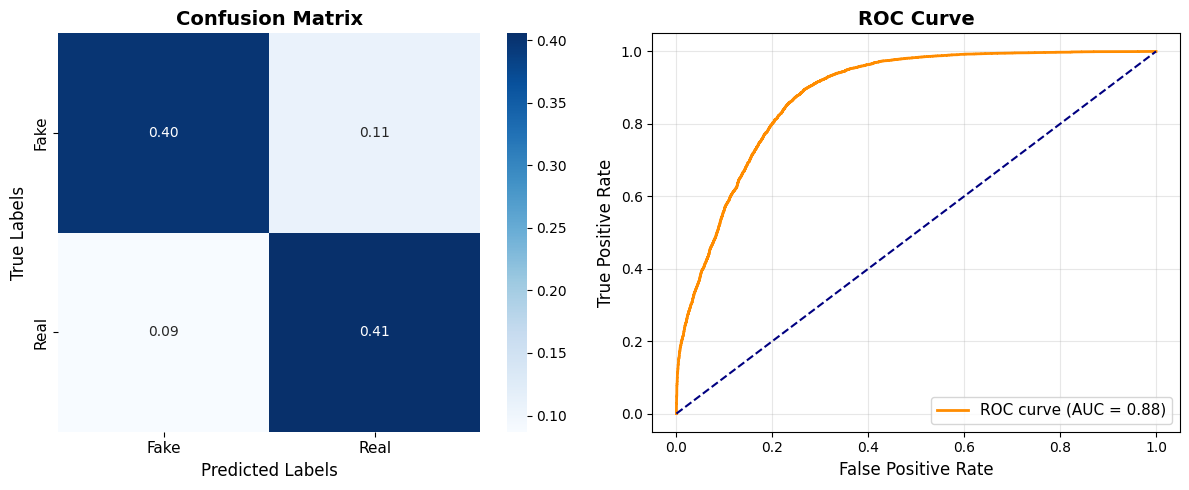

In [ ]:
# Compute Confusion Matrix
matrix = confusion_matrix(y_test, y_pred_lr, normalize='all')

# Compute ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Confusion Matrix ---
sns.heatmap(matrix, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Predicted Labels", fontsize=12)
axes[0].set_ylabel("True Labels", fontsize=12)
axes[0].xaxis.set_ticklabels(["Fake", "Real"], fontsize=11)
axes[0].yaxis.set_ticklabels(["Fake", "Real"], fontsize=11)

# --- ROC Curve ---
axes[1].plot(fpr, tpr, color='darkorange', lw=2,
             label=f"ROC curve (AUC = {roc_auc:.2f})")
axes[1].plot([0,1], [0,1], color='navy', linestyle='--', lw=1.5)
axes[1].set_title("ROC Curve", fontsize=14, fontweight="bold")
axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].legend(loc="lower right", fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(lr, "fake_news_lr_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("\nModels saved successfully: 'fake_news_lr_model.pkl' and 'tfidf_vectorizer.pkl'")


Models saved successfully: 'fake_news_lr_model.pkl' and 'tfidf_vectorizer.pkl'


In [ ]:
sample = ["Breaking: President announces new healthcare reform."]
sample_tfidf = tfidf.transform(sample)
prediction = lr.predict(sample_tfidf)[0]
label = "Real News" if prediction == 1 else "Fake News"
print(f"\nPrediction for sample:\n→ {label}")


Prediction for sample:
→ Real News


**Baseline Model : XG-Boost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42
)

In [ ]:
xgb_model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_tfidf)
y_pred_prob_xgb = xgb_model.predict_proba(X_test_tfidf)[:, 1]

print("\nModel Evaluation:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_xgb) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, digits=3))


Model Evaluation:
Accuracy: 85.14 %

Classification Report:
               precision    recall  f1-score   support

           0      0.908     0.787     0.843      8066
           1      0.807     0.918     0.859      7827

    accuracy                          0.851     15893
   macro avg      0.858     0.852     0.851     15893
weighted avg      0.858     0.851     0.851     15893



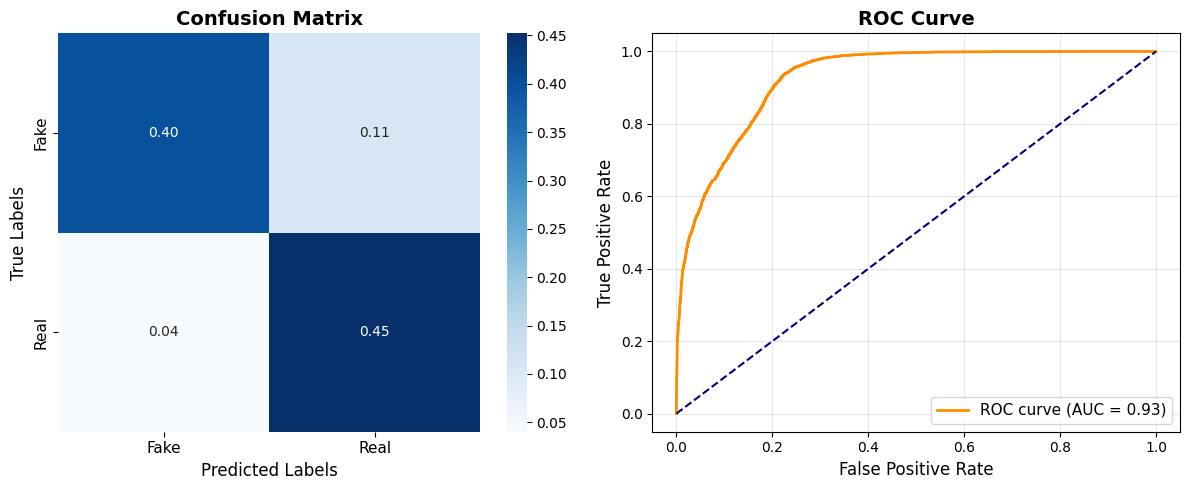

In [ ]:
# Compute Confusion Matrix
matrix = confusion_matrix(y_test, y_pred_xgb, normalize='all')

# Compute ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc = auc(fpr, tpr)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Confusion Matrix ---
sns.heatmap(matrix, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Predicted Labels", fontsize=12)
axes[0].set_ylabel("True Labels", fontsize=12)
axes[0].xaxis.set_ticklabels(["Fake", "Real"], fontsize=11)
axes[0].yaxis.set_ticklabels(["Fake", "Real"], fontsize=11)

# --- ROC Curve ---
axes[1].plot(fpr, tpr, color='darkorange', lw=2,
             label=f"ROC curve (AUC = {roc_auc:.2f})")
axes[1].plot([0,1], [0,1], color='navy', linestyle='--', lw=1.5)
axes[1].set_title("ROC Curve", fontsize=14, fontweight="bold")
axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].legend(loc="lower right", fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(xgb_model, "fake_news_xgb_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("\nModels saved successfully: 'fake_news_xgb_model.pkl' and 'tfidf_vectorizer.pkl'")


Models saved successfully: 'fake_news_xgb_model.pkl' and 'tfidf_vectorizer.pkl'


In [ ]:
sample = ["Breaking: President announces new healthcare reform."]
sample_tfidf = tfidf.transform(sample)
prediction = xgb_model.predict(sample_tfidf)[0]
label = "Real News" if prediction == 1 else "Fake News"
print(f"\nPrediction for sample:\n→ {label}")


Prediction for sample:
→ Real News


**K-Fold Cross Validation using XGBoost**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000, stop_words="english", ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)
# 5-Fold Cross-Validation

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

acc_scores, f1_scores, auc_scores = [], [], []

fold = 1
for train_idx, test_idx in kfold.split(X_tfidf):
    print(f"\nFold {fold}")

    X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        n_jobs=-1,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    acc_scores.append(acc)
    f1_scores.append(f1)
    auc_scores.append(auc)

    print(f"Accuracy: {acc:.4f} | F1: {f1:.4f} | AUC: {auc:.4f}")
    fold += 1


# Overall Performance

print("\nAverage Performance (5-Fold):")
print(f"Accuracy: {np.mean(acc_scores):.4f} ± {np.std(acc_scores):.3f}")
print(f"F1-score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.3f}")
print(f"AUC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.3f}")


Fold 1
Accuracy: 0.8523 | F1: 0.8598 | AUC: 0.9288

Fold 2
Accuracy: 0.8479 | F1: 0.8570 | AUC: 0.9232

Fold 3
Accuracy: 0.8531 | F1: 0.8613 | AUC: 0.9290

Fold 4
Accuracy: 0.8413 | F1: 0.8506 | AUC: 0.9212

Fold 5
Accuracy: 0.8517 | F1: 0.8588 | AUC: 0.9273

Average Performance (5-Fold):
Accuracy: 0.8492 ± 0.004
F1-score: 0.8575 ± 0.004
AUC: 0.9259 ± 0.003


**Deep Learning Model : Long Short-Term Memory(LSTM)**

In [ ]:
vocab_size = 10000
embedding_dim = 64
max_length = 256
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [ ]:
## tokenizer = Tokenizer(num_words=max_vocab)
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding=padding_type, truncating=trunc_type, maxlen=max_length)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding=padding_type, truncating=trunc_type, maxlen=max_length)

In [ ]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
# We are using early stop, which stops when the validation loss no longer improves.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6
)

model_lstm.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history_lstm = model_lstm.fit(X_train, y_train, epochs=10,validation_split=0.1,verbose=1, batch_size=30, shuffle=True, callbacks=[early_stop,reduce_lr])

Epoch 1/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.6519 - loss: 0.5812 - val_accuracy: 0.8005 - val_loss: 0.3827 - learning_rate: 1.0000e-04
Epoch 2/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.8284 - loss: 0.3620 - val_accuracy: 0.8471 - val_loss: 0.3536 - learning_rate: 1.0000e-04
Epoch 3/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.8772 - loss: 0.2873 - val_accuracy: 0.8598 - val_loss: 0.3345 - learning_rate: 1.0000e-04
Epoch 4/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9038 - loss: 0.2337 - val_accuracy: 0.8611 - val_loss: 0.3061 - learning_rate: 1.0000e-04
Epoch 5/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.9222 - loss: 0.1944 - val_accuracy: 0.8671 - val_loss: 0.3040 - learning_rate: 1.0000e-04
Epoch 6/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9350 - loss: 0.1677 - val_accuracy: 0.8597 - val_loss: 0.3590 - learning_rate: 1.0000e-04
Epoch 7/10
1908/1908 ━━━━━━━━━━━━━━━━━━━

In [ ]:
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 256, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 32)             │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,180,357 (8.32 MB)

 Trainable params: 726,785 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,453,572 (5.54 MB)

In [ ]:
# Save entire model (architecture + weights + optimizer state)
model_lstm.save("fake_news_bi_lstm_model.keras")


# Optionally zip it to download later
!zip -r fake_news_bi_lstm_model.zip fake_news_bi_lstm_model


	zip warning: name not matched: fake_news_bi_lstm_model

zip error: Nothing to do! (try: zip -r fake_news_bi_lstm_model.zip . -i fake_news_bi_lstm_model)


**Steps to Push Models in Hugging Face Repo for the Later Evaluation**

In [ ]:
!pip install huggingface_hub
from huggingface_hub import login
login()   # paste your HF access token here

In [ ]:
from huggingface_hub import create_repo

repo_id = "dl-quad/fake-news-bi-lstm-dl-quadrilateral"
create_repo(repo_id, exist_ok=True)


In [ ]:
from huggingface_hub import upload_file

# Upload Logistic Regression
upload_file(
    path_or_fileobj="/content/fake_news_lr_model.pkl",
    path_in_repo="logistic_regression/fake_news_lr_model.pkl",
    repo_id=repo_id,
    repo_type="model",
    commit_message="Upload Logistic Regression model"
)

# Upload XGBoost
upload_file(
    path_or_fileobj="/content/fake_news_xgb_model.pkl",
    path_in_repo="xgboost/fake_news_xgb_model.pkl",
    repo_id=repo_id,
    repo_type="model",
    commit_message="Upload XGBoost model"
)

# Upload LSTM model
upload_file(
    path_or_fileobj="/content/fake_news_bi_lstm_model.keras",
    path_in_repo="lstm/fake_news_bi_lstm_model.keras",
    repo_id=repo_id,
    repo_type="model",
    commit_message="Upload LSTM model"
)

# Upload tokenizer for LSTM
upload_file(
    path_or_fileobj="/content/tokenizer.pkl",
    path_in_repo="lstm/tokenizer.pkl",
    repo_id=repo_id,
    repo_type="model",
    commit_message="Upload tokenizer"
)

# Upload TF-IDF vectorizer
upload_file(
    path_or_fileobj="/content/tfidf_vectorizer.pkl",
    path_in_repo="tfidf_vectorizer/tfidf_vectorizer.pkl",
    repo_id=repo_id,
    repo_type="model",
    commit_message="Upload TF-IDF vectorizer"
)

print("All models and artifacts uploaded successfully!")


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...nt/fake_news_lr_model.pkl: 100%|##########| 64.9kB / 64.9kB            

  ...nt/fake_news_lr_model.pkl: 100%|##########| 64.9kB / 64.9kB            

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...t/fake_news_xgb_model.pkl: 100%|##########|  869kB /  869kB            

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ..._news_bi_lstm_model.keras: 100%|##########| 8.79MB / 8.79MB            

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  /content/tokenizer.pkl      :  78%|#######8  | 8.35MB / 10.6MB            

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...tent/tfidf_vectorizer.pkl: 100%|##########|  304kB /  304kB            

✅ All models and artifacts uploaded successfully!


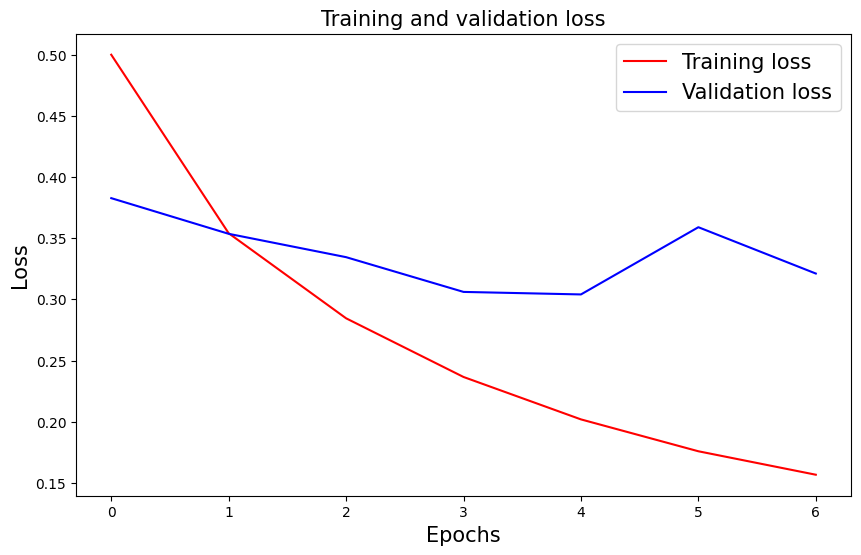

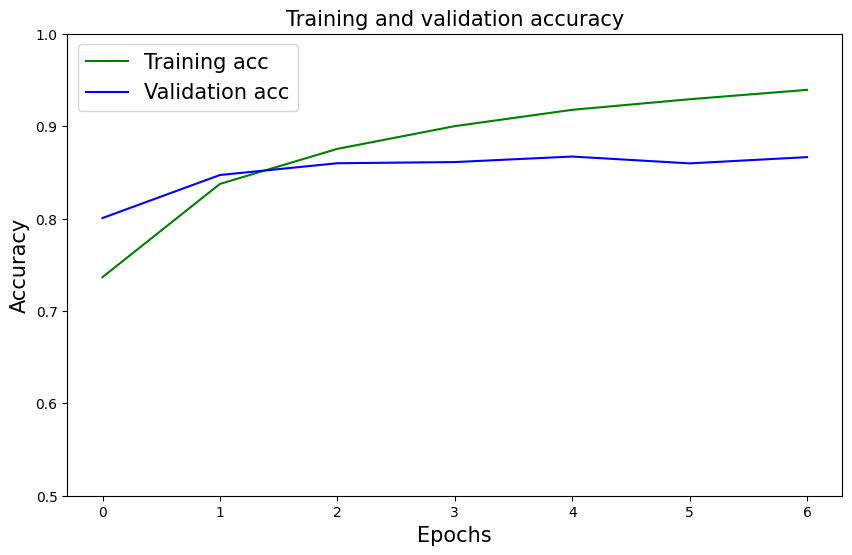

In [ ]:
history_dict = history_lstm.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history_lstm.epoch

plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss', size=15)
plt.legend(prop={'size': 15})
plt.show()

plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.legend(prop={'size': 15})
plt.ylim((0.5,1))
plt.show()

**Training Summary**

*1. Training Loss*

*  Training loss decreases steadily and consistently across epochs.

* This indicates that the model is learning the training data well.

*2. Validation Loss*

* Validation loss decreases initially but then begins to fluctuate and slightly increase after ~3 epochs.

* This suggests the model starts to overfit after the 3rd or 4th epoch.

*3. Training Accuracy*

* Training accuracy increases smoothly and reaches close to 0.95 by the end.

* This is expected as the model learns patterns in the training set.

*4. Validation Accuracy*

* Validation accuracy improves initially and stabilizes around 0.88–0.90.

* After a few epochs, it does not improve further, hinting that more training does not help generalization.

**Model Evaluation**

In [ ]:
model_lstm.evaluate(X_test, y_test)

497/497 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8684 - loss: 0.3087


[0.3052198886871338, 0.8704460859298706]

In [ ]:
pred = model_lstm.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

497/497 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step


In [ ]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.8704461083495879
Precision on testing set: 0.8540948000511052
Recall on testing set: 0.8793738489871087


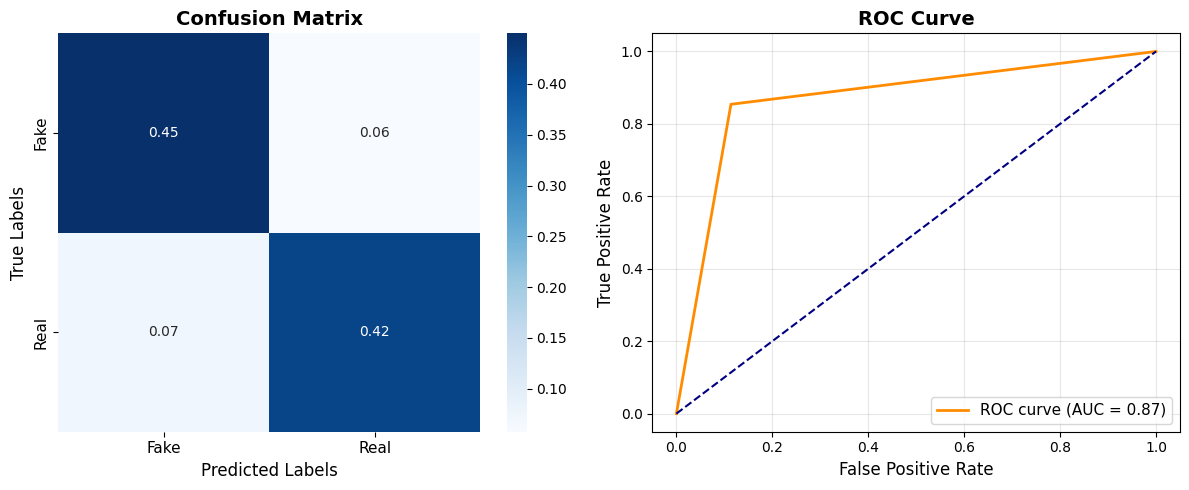

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Confusion Matrix
matrix = confusion_matrix(y_test, binary_predictions, normalize='all')

# Compute ROC
fpr, tpr, _ = roc_curve(y_test, binary_predictions)
roc_auc = auc(fpr, tpr)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Confusion Matrix ---
sns.heatmap(matrix, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Predicted Labels", fontsize=12)
axes[0].set_ylabel("True Labels", fontsize=12)
axes[0].xaxis.set_ticklabels(["Fake", "Real"], fontsize=11)
axes[0].yaxis.set_ticklabels(["Fake", "Real"], fontsize=11)

# --- ROC Curve ---
axes[1].plot(fpr, tpr, color='darkorange', lw=2,
             label=f"ROC curve (AUC = {roc_auc:.2f})")
axes[1].plot([0,1], [0,1], color='navy', linestyle='--', lw=1.5)
axes[1].set_title("ROC Curve", fontsize=14, fontweight="bold")
axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].legend(loc="lower right", fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("y_test:", len(y_test))
print("y_pred_lr:", len(y_pred_lr))
print("y_pred_xgb:", len(y_pred_xgb))
print("binary_predictions (LSTM):", len(binary_predictions))


y_test: 15892
y_pred_lr: 15893
y_pred_xgb: 15893
binary_predictions (LSTM): 15893


In [ ]:
min_len = len(y_test)

y_pred_lr = y_pred_lr[:min_len]
y_pred_xgb = y_pred_xgb[:min_len]
binary_predictions = binary_predictions[:min_len]


In [ ]:
y_pred_prob_lr = y_pred_prob_lr[:min_len]
y_pred_prob_xgb = y_pred_prob_xgb[:min_len]
y_pred_prob_lstm = binary_predictions[:min_len]  # sigmoid output before threshold


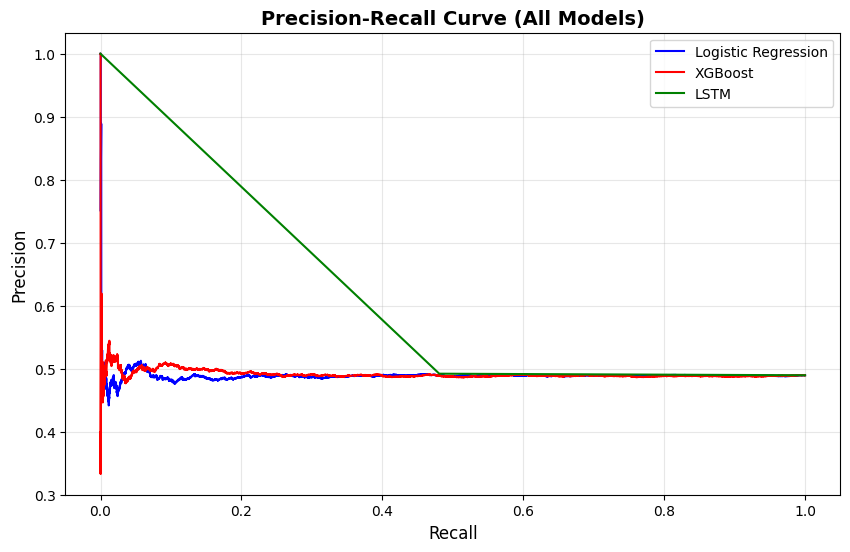

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Precision-recall curves
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob_lr)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, y_pred_prob_xgb)
lstm_precision, lstm_recall, _ = precision_recall_curve(y_test, y_pred_prob_lstm)

# Plot
plt.figure(figsize=(10,6))
plt.plot(lr_recall, lr_precision, color='blue', label='Logistic Regression')
plt.plot(xgb_recall, xgb_precision, color='red', label='XGBoost')
plt.plot(lstm_recall, lstm_precision, color='green', label='LSTM')

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve (All Models)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**The Moment of Truth:**


* All three models (LR, XGB, LSTM) perform similarly in distinguishing fake vs. real news.

* LSTM has excellent precision only at extremely low recall.

* For general recall ranges, LR and XGB perform similarly and consistently.

* Overall, these results indicate current models have limited separation power, and a transformer-based model (like BERT) is the logical next improvement.



**Steps to setup streamlit UI**

In [7]:
!pip install streamlit
!pip install tensorflow xgboost scikit-learn huggingface_hub joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.0 MB/s eta 0:00:00


In [8]:
%%writefile app.py
import streamlit as st
import joblib
import tensorflow as tf
from huggingface_hub import hf_hub_download
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 200
REPO_ID = "dl-quad/fake-news-bi-lstm-dl-quadrilateral"

KERAS_MODEL_FILE = "lstm/fake_news_bi_lstm_model.keras"
KERAS_TOKENIZER_FILE = "lstm/tokenizer.pkl"


# Load Model & Tokenizer
@st.cache_resource
def load_lstm_model():
    keras_model_path = hf_hub_download(repo_id=REPO_ID, filename=KERAS_MODEL_FILE)
    keras_tokenizer_path = hf_hub_download(repo_id=REPO_ID, filename=KERAS_TOKENIZER_FILE)

    keras_model = tf.keras.models.load_model(keras_model_path)
    keras_tokenizer = joblib.load(keras_tokenizer_path)

    return keras_model, keras_tokenizer

keras_model, keras_tokenizer = load_lstm_model()


# Prediction Function
def predict_with_lstm(text):
    seq = keras_tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=MAX_LEN, padding='post', truncating='post')

    prob_raw = keras_model.predict(padded)[0][0]
    prob_real = float(tf.nn.sigmoid(prob_raw).numpy())

    return prob_real  # REAL probability


# Streamlit UI
st.title("Fake News Detection – Bi-LSTM Model")

st.write("### Model Settings")
threshold = st.slider("Decision Threshold (Recommended: 0.40 – 0.50)", 0.1, 0.9, 0.40)
uncertainty_margin = st.slider("Uncertainty Range (+/-)", 0.05, 0.30, 0.10)

user_text = st.text_area("Enter news text for classification:", height=200)


if st.button("Predict"):
    if not user_text.strip():
        st.warning("Please enter some text.")
    else:
        prob_real = predict_with_lstm(user_text)
        prob_fake = 1 - prob_real

        lower_bound = threshold - uncertainty_margin
        upper_bound = threshold + uncertainty_margin

        st.subheader("Prediction Result")


        # Uncertain zone
        if lower_bound <= prob_real <= upper_bound:
            st.warning("**UNCERTAIN NEWS** — Model is not confident.\nPlease verify with trusted sources.")
            st.write(f"Real Confidence: {prob_real * 100:.2f}%")
            st.write(f"Fake Confidence: {prob_fake * 100:.2f}%")
            st.progress(prob_real)


        # Clear REAL
        elif prob_real > upper_bound:
            st.success(f"Prediction: **REAL NEWS**")
            st.write(f"Real Confidence: {prob_real * 100:.2f}%")
            st.progress(prob_real)


        # Clear FAKE
        else:
            st.error(f"Prediction: **FAKE NEWS**")
            st.write(f"Fake Confidence: {prob_fake * 100:.2f}%")
            st.progress(prob_fake)


Overwriting app.py


In [3]:
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
added 22 packages in 4s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [4]:
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!sudo dpkg -i cloudflared-linux-amd64.deb


Selecting previously unselected package cloudflared.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack cloudflared-linux-amd64.deb ...
Unpacking cloudflared (2025.11.1) ...
Setting up cloudflared (2025.11.1) ...
Processing triggers for man-db (2.10.2-1) ...


In [9]:
!streamlit run app.py --server.port 8501 --server.address 0.0.0.0 & sleep 2 && cloudflared tunnel --url http://localhost:8501 --no-autoupdate




2025-11-27T17:28:33Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-11-27T17:28:33Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-11-27T17:28:36Z INF +--------------------------------------------------------------------------------------------+
2025-11-27T17:28:36Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-11-27T17:28:36Z INF |  https://equipment-cheaper-glasses-basement.trycloud

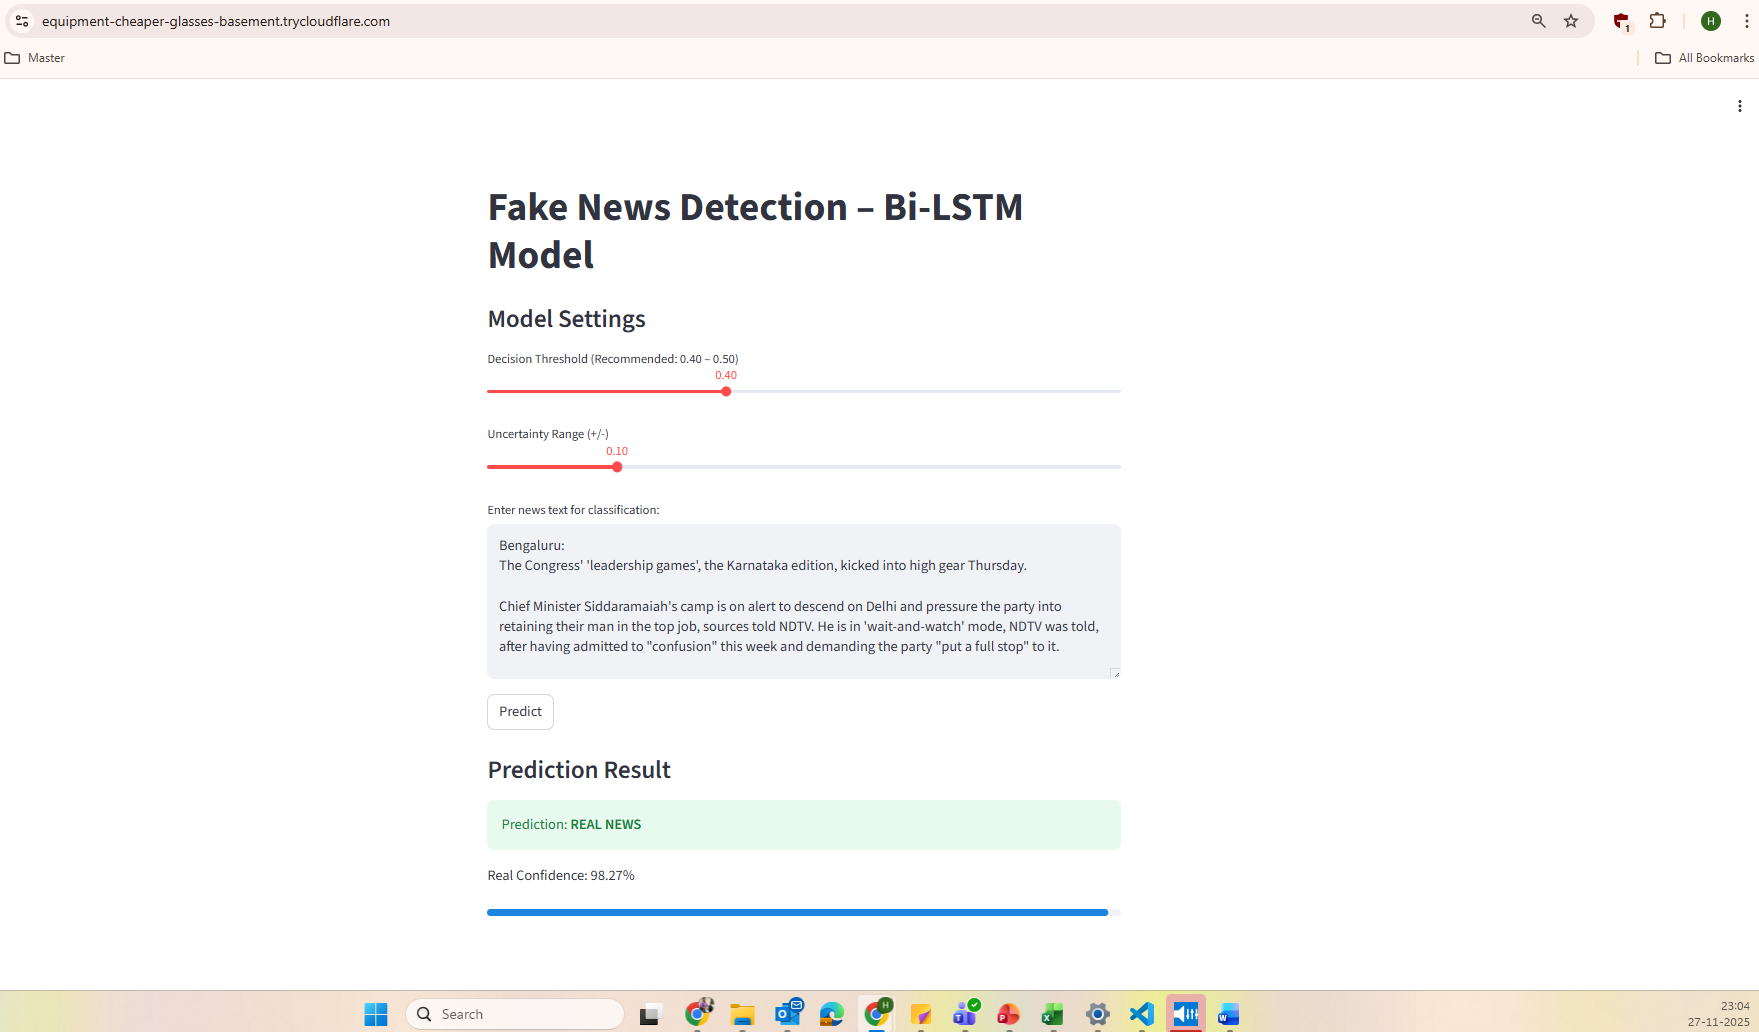

**Next Steps(Future Work)**

After implementing and evaluating the Bi-LSTM model for fake news detection, the next stage is to explore more advanced architectures, especially transformer-based models. The planned next steps are:

***1. Implement Transformer-based Models***

* Train and fine-tune BERT (Bidirectional Encoder Representations from Transformers).

* Experiment with lighter variants like DistilBERT for faster inference.

* Explore domain-specific models such as RoBERTa or ALBERT.

***2. Compare Performance***

* Evaluate BERT models against the Bi-LSTM model on:

* accuracy

* F1-score

* inference time

* robustness on unseen data

***3. Use Transfer Learning***

* Leverage pretrained transformer checkpoints from HuggingFace.

* Fine-tune on the fake-news dataset for improved contextual understanding.

***4. Add Ensemble Approaches***

* Combine predictions from LSTM, BERT, and classical models (LR, XGBoost).

* Use stacking or weighted averaging to improve reliability.

***5. Deploy the Improved Model***

* Update the current Streamlit app with a BERT option.

* Optimize model size for real-time inference.